Scripts for manuscript in prep by Del Vecchio, Lathrop, Fratkin, Glade, Zwieback, Rowland and others on Teller 47 watershed surface processes

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.colors as colors

import rasterio
from rasterio.plot import show
import fiona 
import geopandas as gpd
from rasterstats import zonal_stats
import rioxarray as rxr
import xarray

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import  GridSpec
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
if os.getlogin() == 'joanm':
    data_path = "C:\\Users\\joanm\\OneDrive - Dartmouth College\\NGEE_projects\\Teller_47\\Teller_47_Data\\"
elif os.getlogin() == 'f005dv1':
    data_path = "E:\\Del_Vecchio_OneDrive\\OneDrive - Dartmouth College\\NGEE_projects\\Teller_47\\Teller_47_Data\\"
else:
    print("Who are you people? Go set your data path somewhere else I guess")

# Overview map

## Code to import geospatial data

In [16]:
regional_dem = os.path.join(data_path,"Teller_47_Data_Maps\\regional_dem.tif" )
regional_slope = os.path.join(data_path,"Teller_47_Data_Maps\\regional_slope.tif" )
water_vectors = os.path.join(data_path,"Teller_47_Data_Maps\\water_vectors.shp")

t47_dem = rasterio.open(os.path.join(data_path,"Teller_47_Data_Maps\\zoom_dem.tif"  ))
t47_slope = rasterio.open(os.path.join(data_path,"Teller_47_Data_Maps\\zoom_slope.tif"  ))

dem = rasterio.open(regional_dem)
slope = rasterio.open(regional_slope)
water = gpd.read_file(water_vectors)

In [18]:
water = water[water['water'] == 1]
water = water.to_crs('EPSG:32603')

In [19]:
sites_3N_box=[
            sites_3N.total_bounds[0],
              sites_3N.total_bounds[2],
              sites_3N.total_bounds[1],
              sites_3N.total_bounds[3]
             ]
box_params = [(sites_3N_box[0],sites_3N_box[3]),
              (sites_3N_box[1]-sites_3N_box[0]),
              (sites_3N_box[2]-sites_3N_box[3])]

In [20]:
# Create a shapefile from target positions in UTM Zone 3N
average_cleaned_final = pd.read_csv("target_locs_cleaned.csv")
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(average_cleaned_final['Easting_2019_y'], average_cleaned_final['Northing_2019_y'])]
sites_3N = gpd.GeoDataFrame(average_cleaned_final, crs="EPSG:32603", geometry=geometry)
sites_3N.head()

Unnamed: 0 target_name  Easting_2018_y  Northing_2018_y  Elevation_2018_y  \
0           0   Target 1B   443052.250900     7.206594e+06         99.986366   
1           1   Target 1F   443060.962800     7.206547e+06         91.659086   
2           2   Target 1M   443057.235150     7.206555e+06         93.255323   
3           3   Target 1S   443057.726375     7.206575e+06         96.744242   
4           4   Target 2B   443003.830000     7.206679e+06        121.632294   

   H_Prec_Obs_2018_y  V_Prec_Obs_2018_y  rebar_height_m_2019  Easting_2019_y  \
0           0.012774           0.015074                  0.0    443052.25015   
1           0.013685           0.016168                  0.0    443060.97080   
2           0.014075           0.016635                  0.0    443057.29600   
3           0.013130           0.015459                  0.0    443057.71285   
4           0.013061           0.015362                  0.0    443003.84415   

   Northing_2019_y  ...   Easting_2017  Northing_2017  Elevation_2017  \
0     7.206594e+06  ...  443052.240250   7.206594e+06      100.044618   
1     7.206547e+06  ...  443060.928425   7.206547e+06       91.768130   
2     7.206555e+06  ...  443057.188700   7.206555e+06       93.278272   
3     7.206574e+06  ...  443057.686525   7.206575e+06       96.797417   
4     7.206679e+06  ...  443003.851850   7.206680e+06      121.691813   

   LocalLatit_2017  LocalLongi_2017  LocalEllip_2017  H_Prec_Obs_2017  \
0        64.978431      -166.206713       105.011799         0.012146   
1        64.978011      -166.206510        96.735910         0.011675   
2        64.978084      -166.206593        98.245939         0.011702   
3        64.978256      -166.206590       101.764855         0.011843   
4        64.979188      -166.207773       126.657827         0.015727   

   V_Prec_Obs_2017  type                        geometry  
0         0.014553  lobe  POINT (443052.250 7206594.078)  
1         0.013917  lobe  POINT (443060.971 7206546.869)  
2         0.013944  lobe  POINT (443057.296 7206555.197)  
3         0.014139  lobe  POINT (443057.713 7206574.451)  
4         0.020657  lobe  POINT (443003.844 7206679.436)  

[5 rows x 32 columns]

In [21]:
insar_pts = gpd.read_file("insar_pts.shp").to_crs("EPSG:32603")


## Code to make map

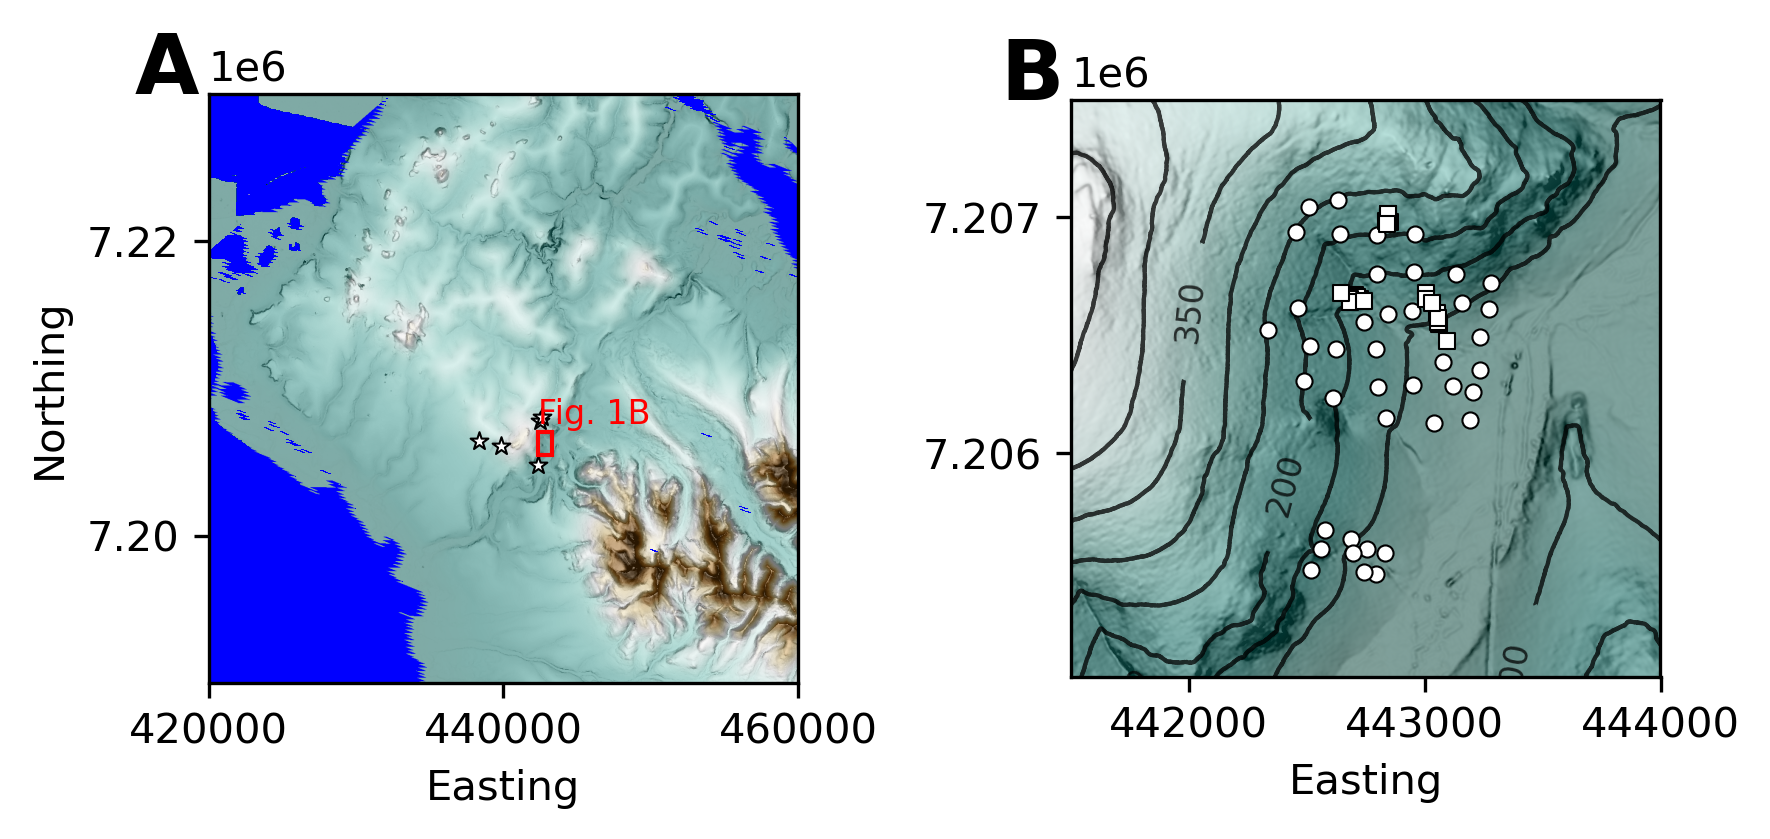

In [22]:
from rasterio.plot import show


fig, ax = plt.subplots(1,2, figsize=(6,3),dpi=300)

# transform rasterio plot to real world coords
extent_r=[dem.bounds[0], dem.bounds[2], dem.bounds[1], dem.bounds[3]]
extent_t47=[t47_dem.bounds[0], t47_dem.bounds[2], t47_dem.bounds[1], t47_dem.bounds[3]]

im0 = rasterio.plot.show(slope, extent=extent_r,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax[0])
im1 = rasterio.plot.show(dem, extent=extent_r,
                         cmap="BrBG_r",
                         ax=ax[0],
                         vmax=(np.nanmax(dem.read(1))*0.67), # % of highest elev. non-nan
                         alpha=0.5,
                        zorder=1)

water.plot(color='b',ax=ax[0])

insar_pts.plot(ax=ax[0],
               marker='*',
               edgecolor='k',
               color='w',
               markersize=20,
               linewidth=0.5,
              )

box = matplotlib.patches.Rectangle(box_params[0],
                                   width = box_params[1],
                                   height = box_params[2],
                                   edgecolor='r',
                                   facecolor='none')

ax[0].add_patch(box)


im0 = rasterio.plot.show(t47_slope, extent=extent_t47,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax[1])
im1 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         cmap="BrBG_r",
                         ax=ax[1],
                         vmax=(np.nanmax(dem.read(1))*0.67), # % of highest elev. non-nan
                         alpha=0.5,
                        zorder=1)
im2 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         contour=True,
                         levels=np.arange(0,np.nanmax(dem.read(1)),50),
                         colors=['black'],
                         linewidths=1,
                         contour_label_kws={
                             "colors":"black",
                             "fontsize":8,
                             "inline_spacing":3,
                         #"fmt":"%1.0f"
                         },
                         ax=ax[1],
                         alpha=0.75,
                        zorder=2)

sites_3N[sites_3N['type'] == 'gcp'].plot(marker='o',
                                         edgecolor='k',
                                         color='w',
                                         markersize=15,
                                         linewidth=0.5,
                                         ax=ax[1],
                                        zorder=3)
sites_3N[sites_3N['type'] == 'lobe'].plot(marker='s',
                                         edgecolor='k',
                                         color='w',
                                         markersize=15,
                                         linewidth=0.5,
                                          ax=ax[1],
                                         zorder=3)

ax[0].set_ylim((7.19e6, 7.23e6))
ax[0].set_xlim((4.2e5, 4.6e5))
ax[0].locator_params(axis='x', nbins=3)
ax[0].locator_params(axis='y', nbins=3)
ax[0].set_xlabel("Easting")
ax[0].set_ylabel("Northing")
ax[0].text(4.2e5-5000, 7.23e6, "A",size=20, weight='bold')
ax[0].text(box_params[0][0], box_params[0][1]+500, "Fig. 1B",color="r",size=8)


ax[1].set_ylim((7.20505e6, 7.2075e6))
ax[1].set_xlim((4.415e5, 4.440e5))
ax[1].locator_params(axis='x', nbins=3)
ax[1].locator_params(axis='y', nbins=3)
ax[1].set_xlabel("Easting")
ax[1].text(4.415e5-300, 7.2075e6, "B",size=20, weight='bold')


ax[0].set_facecolor('b')

fig.tight_layout()

# dGPS

## New

In [9]:
def distance(x1,x2,y1,y2):
    return ((x2-x1)**2 + (y1-y2)**2) ** (1/2)

In [6]:
locs = pd.read_csv("target_locs_cleaned.csv")
locs.head()

Unnamed: 0 target_name  Easting_2018_y  Northing_2018_y  Elevation_2018_y  \
0           0   Target 1B   443052.250900     7.206594e+06         99.986366   
1           1   Target 1F   443060.962800     7.206547e+06         91.659086   
2           2   Target 1M   443057.235150     7.206555e+06         93.255323   
3           3   Target 1S   443057.726375     7.206575e+06         96.744242   
4           4   Target 2B   443003.830000     7.206679e+06        121.632294   

   H_Prec_Obs_2018_y  V_Prec_Obs_2018_y  rebar_height_m_2019  Easting_2019_y  \
0           0.012774           0.015074                  0.0    443052.25015   
1           0.013685           0.016168                  0.0    443060.97080   
2           0.014075           0.016635                  0.0    443057.29600   
3           0.013130           0.015459                  0.0    443057.71285   
4           0.013061           0.015362                  0.0    443003.84415   

   Northing_2019_y  ...   Easting_2017  Northing_2017  Elevation_2017  \
0     7.206594e+06  ...  443052.240250   7.206594e+06      100.044618   
1     7.206547e+06  ...  443060.928425   7.206547e+06       91.768130   
2     7.206555e+06  ...  443057.188700   7.206555e+06       93.278272   
3     7.206574e+06  ...  443057.686525   7.206575e+06       96.797417   
4     7.206679e+06  ...  443003.851850   7.206680e+06      121.691813   

   LocalLatit_2017  LocalLongi_2017  LocalEllip_2017  H_Prec_Obs_2017  \
0        64.978431      -166.206713       105.011799         0.012146   
1        64.978011      -166.206510        96.735910         0.011675   
2        64.978084      -166.206593        98.245939         0.011702   
3        64.978256      -166.206590       101.764855         0.011843   
4        64.979188      -166.207773       126.657827         0.015727   

   V_Prec_Obs_2017  type                            geometry  
0         0.014553  lobe   POINT (443052.25015 7206594.0785)  
1         0.013917  lobe     POINT (443060.9708 7206546.869)  
2         0.013944  lobe     POINT (443057.296 7206555.1975)  
3         0.014139  lobe  POINT (443057.71285 7206574.45075)  
4         0.020657  lobe    POINT (443003.84415 7206679.436)  

[5 rows x 32 columns]

In [13]:
locs['dDist_1819'] = distance(locs['Easting_2018_y'],locs['Easting_2019_y'],locs['Northing_2018_y'],locs['Northing_2019_y'])
locs['dDist_1718'] = distance(locs['Easting_2017'],locs['Easting_2018_y'],locs['Northing_2017'],locs['Northing_2018_y'])
locs['dDist_1719_avg'] = distance(locs['Easting_2017'],locs['Easting_2019_y'],locs['Northing_2017'],locs['Northing_2019_y'])/2
locs['dElev_1819'] = locs['Elevation_2019_y'] - locs['Elevation_2018_y'] 
locs['dElev_1718'] = locs['Elevation_2018_y'] - locs['Elevation_2017'] 
locs['dElev_1719_avg'] = (locs['Elevation_2019_y'] - locs['Elevation_2017']) /2

In [29]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(locs['Easting_2019_y'], locs['Northing_2019_y'])]
sites_3N = gpd.GeoDataFrame(locs, crs="EPSG:32603", geometry=geometry)
sites_3N

Unnamed: 0 target_name  Easting_2018_y  Northing_2018_y  Elevation_2018_y  \
0            0   Target 1B   443052.250900     7.206594e+06         99.986366   
1            1   Target 1F   443060.962800     7.206547e+06         91.659086   
2            2   Target 1M   443057.235150     7.206555e+06         93.255323   
3            3   Target 1S   443057.726375     7.206575e+06         96.744242   
4            4   Target 2B   443003.830000     7.206679e+06        121.632294   
..         ...         ...             ...              ...               ...   
60          60      t2_ex4   442577.426800     7.205674e+06        131.122456   
61          61      t2_ex5   442560.737700     7.205594e+06        131.646748   
62          62      t2_ex6   442519.683900     7.205505e+06        129.345736   
63          63      t2_ex8   442694.134100     7.205578e+06         89.854766   
64          64      t2_ex9   442744.489400     7.205495e+06         80.991931   

    H_Prec_Obs_2018_y  V_Prec_Obs_2018_y  rebar_height_m_2019  Easting_2019_y  \
0            0.012774           0.015074                0.000    443052.25015   
1            0.013685           0.016168                0.000    443060.97080   
2            0.014075           0.016635                0.000    443057.29600   
3            0.013130           0.015459                0.000    443057.71285   
4            0.013061           0.015362                0.000    443003.84415   
..                ...                ...                  ...             ...   
60           0.027219           0.051452                0.070    442577.47090   
61           0.029170           0.051807                0.055    442560.70630   
62           0.042527           0.055859                0.145    442519.88940   
63           0.025451           0.030197                0.115    442694.33840   
64           0.017989           0.020631                0.105    442744.57870   

    Northing_2019_y  ...  H_Prec_Obs_2017  V_Prec_Obs_2017  type  \
0      7.206594e+06  ...         0.012146         0.014553  lobe   
1      7.206547e+06  ...         0.011675         0.013917  lobe   
2      7.206555e+06  ...         0.011702         0.013944  lobe   
3      7.206574e+06  ...         0.011843         0.014139  lobe   
4      7.206679e+06  ...         0.015727         0.020657  lobe   
..              ...  ...              ...              ...   ...   
60     7.205674e+06  ...              NaN              NaN   gcp   
61     7.205594e+06  ...              NaN              NaN   gcp   
62     7.205505e+06  ...              NaN              NaN   gcp   
63     7.205578e+06  ...              NaN              NaN   gcp   
64     7.205495e+06  ...              NaN              NaN   gcp   

                          geometry  dDist_1819  dDist_1718  dDist_1719_avg  \
0   POINT (443052.250 7206594.078)    0.064754    0.066854        0.065562   
1   POINT (443060.971 7206546.869)    0.153958    0.125788        0.138999   
2   POINT (443057.296 7206555.197)    0.158635    0.123795        0.141213   
3   POINT (443057.713 7206574.451)    0.061505    0.077526        0.064605   
4   POINT (443003.844 7206679.436)    0.030927    0.056635        0.040060   
..                             ...         ...         ...             ...   
60  POINT (442577.471 7205674.062)    0.049283         NaN             NaN   
61  POINT (442560.706 7205594.178)    0.078549         NaN             NaN   
62  POINT (442519.889 7205504.988)    0.233562         NaN             NaN   
63  POINT (442694.338 7205578.322)    0.240030         NaN             NaN   
64  POINT (442744.579 7205495.240)    0.107030         NaN             NaN   

    dElev_1819  dElev_1718  dElev_1719_avg  
0    -0.138233   -0.058251       -0.098242  
1    -0.233131   -0.109044       -0.171087  
2    -0.220211   -0.022950       -0.121581  
3    -0.115499   -0.053175       -0.084337  
4     0.014631   -0.059519       -0.022444  
..         ...         ...        

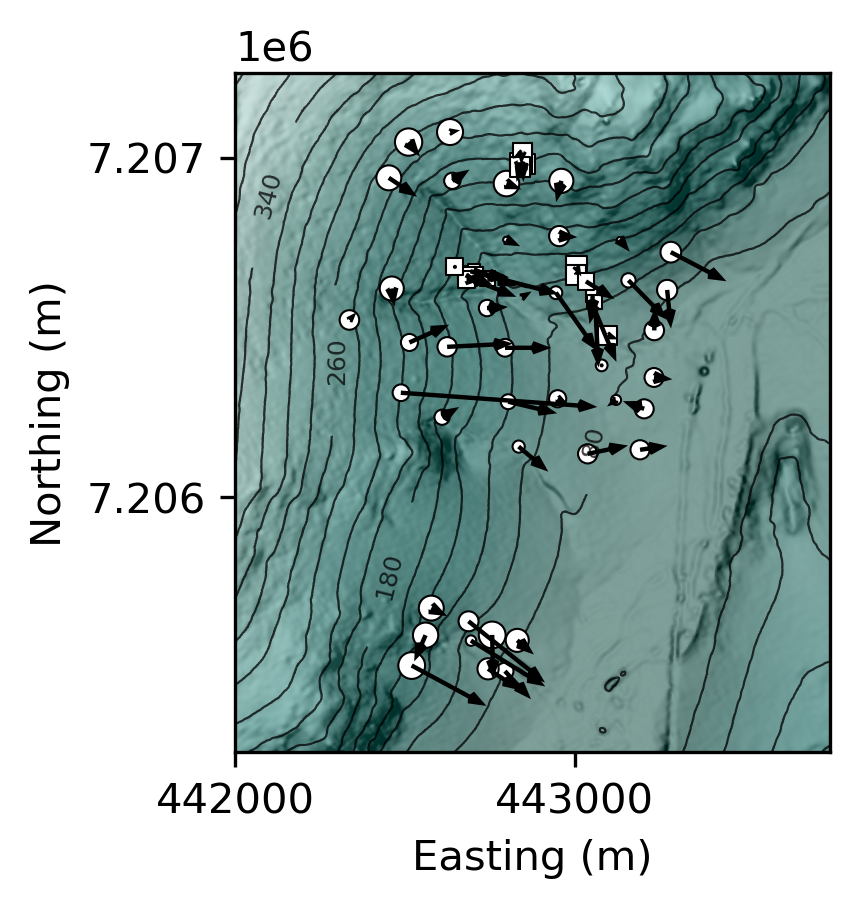

In [70]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
im0 = rasterio.plot.show(t47_slope, extent=extent_t47,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax)
im1 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         cmap="BrBG_r",
                         ax=ax,
                         vmax=(np.nanmax(dem.read(1))*0.67), # % of highest elev. non-nan
                         alpha=0.5,
                        zorder=1)
im2 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         contour=True,
                         levels=np.arange(0,np.nanmax(dem.read(1)),20),
                         colors=['black'],
                         linewidths=0.5,
                         contour_label_kws={
                             "colors":"black",
                             "fontsize":6,
                             "inline_spacing":3,
                         #"fmt":"%1.0f"
                         },
                         ax=ax,
                         alpha=0.75,
                        zorder=2)

sites_3N[sites_3N['type'] == 'gcp'].plot(marker='o',
                                         edgecolor='k',
                                         color='w',
                                         markersize=(sites_3N['dElev_1819']+abs(sites_3N['dElev_1819'].min()))*100,
                                         linewidth=0.5,
                                         ax=ax,
                                        zorder=3)
sites_3N[sites_3N['type'] == 'lobe'].plot(marker='s',
                                         edgecolor='k',
                                         color='w',
                                         markersize=(sites_3N['dElev_1819']+abs(sites_3N['dElev_1819'].min()))*100,
                                         linewidth=0.5,
                                          ax=ax,
                                         zorder=3)
X = locs['Easting_2018_y'].values
Y = locs['Northing_2018_y'].values
U = locs['Easting_2019_y']-locs['Easting_2018_y'].values
V = locs['Northing_2019_y']-locs['Northing_2018_y'].values
ax.quiver(X,Y, U, V,
          headwidth=3,
          headlength=4,
          zorder=4)




ax.set_ylim((7.20525e6, 7.20725e6))
ax.set_xlim((4.42e5, 4.4375e5))
ax.locator_params(axis='x', nbins=3)
ax.locator_params(axis='y', nbins=3)
ax.set_ylabel("Northing (m)")
ax.set_xlabel("Easting (m)")


plt.savefig("vector_map_all.png")

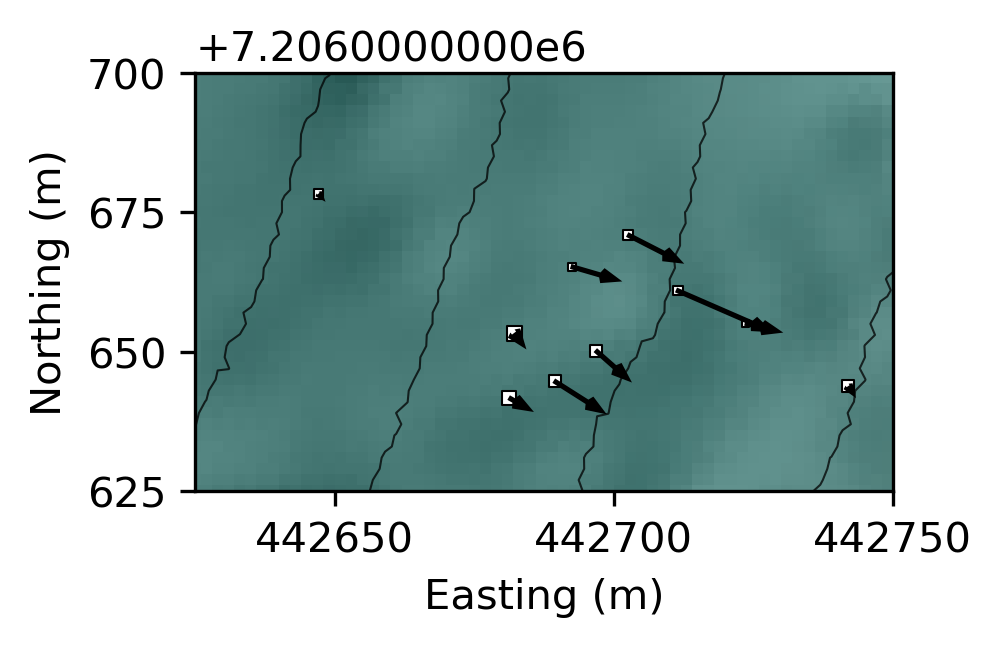

In [72]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
im0 = rasterio.plot.show(t47_slope, extent=extent_t47,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax)
im1 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         cmap="BrBG_r",
                         ax=ax,
                         vmax=(np.nanmax(dem.read(1))*0.67), # % of highest elev. non-nan
                         alpha=0.5,
                        zorder=1)
im2 = rasterio.plot.show(t47_dem, extent=extent_t47,
                         contour=True,
                         levels=np.arange(0,np.nanmax(dem.read(1)),10),
                         colors=['black'],
                         linewidths=0.5,
                         contour_label_kws={
                             "colors":"black",
                             "fontsize":6,
                             "inline_spacing":3,
                         #"fmt":"%1.0f"
                         },
                         ax=ax,
                         alpha=0.75,
                        zorder=2)
sites_3N[sites_3N['type'] == 'lobe'].plot(marker='s',
                                         edgecolor='k',
                                         color='w',
                                         markersize=(sites_3N['dElev_1719_avg']+abs(sites_3N['dElev_1719_avg'].min()))*100,
                                         linewidth=0.5,
                                          ax=ax,
                                         zorder=3)
X = locs['Easting_2017'].values
Y = locs['Northing_2017'].values
U = (locs['Easting_2019_y']-locs['Easting_2017'].values)/2
V = (locs['Northing_2019_y']-locs['Northing_2017'].values)/2
ax.quiver(X,Y, U, V,
          headwidth=3,
          headlength=4,
          zorder=4)
ax.set_ylim((7.206625e6, 7.2067e6))
ax.set_xlim((4.42625e5, 4.4275e5))
ax.locator_params(axis='x', nbins=3)
ax.locator_params(axis='y', nbins=3)
ax.set_ylabel("Northing (m)")
ax.set_xlabel("Easting (m)")

plt.savefig("vector_map_lobe.png")

## GCPs

In [251]:
topo_labels = ["Slope (deg)", "Radiation (W/m2)", "Drainage area (m2)"]

In [252]:
df = pd.read_csv(data_path+"Teller_47_Data_dGPS\\T47_GCPs_extract.csv",na_values='-9999')


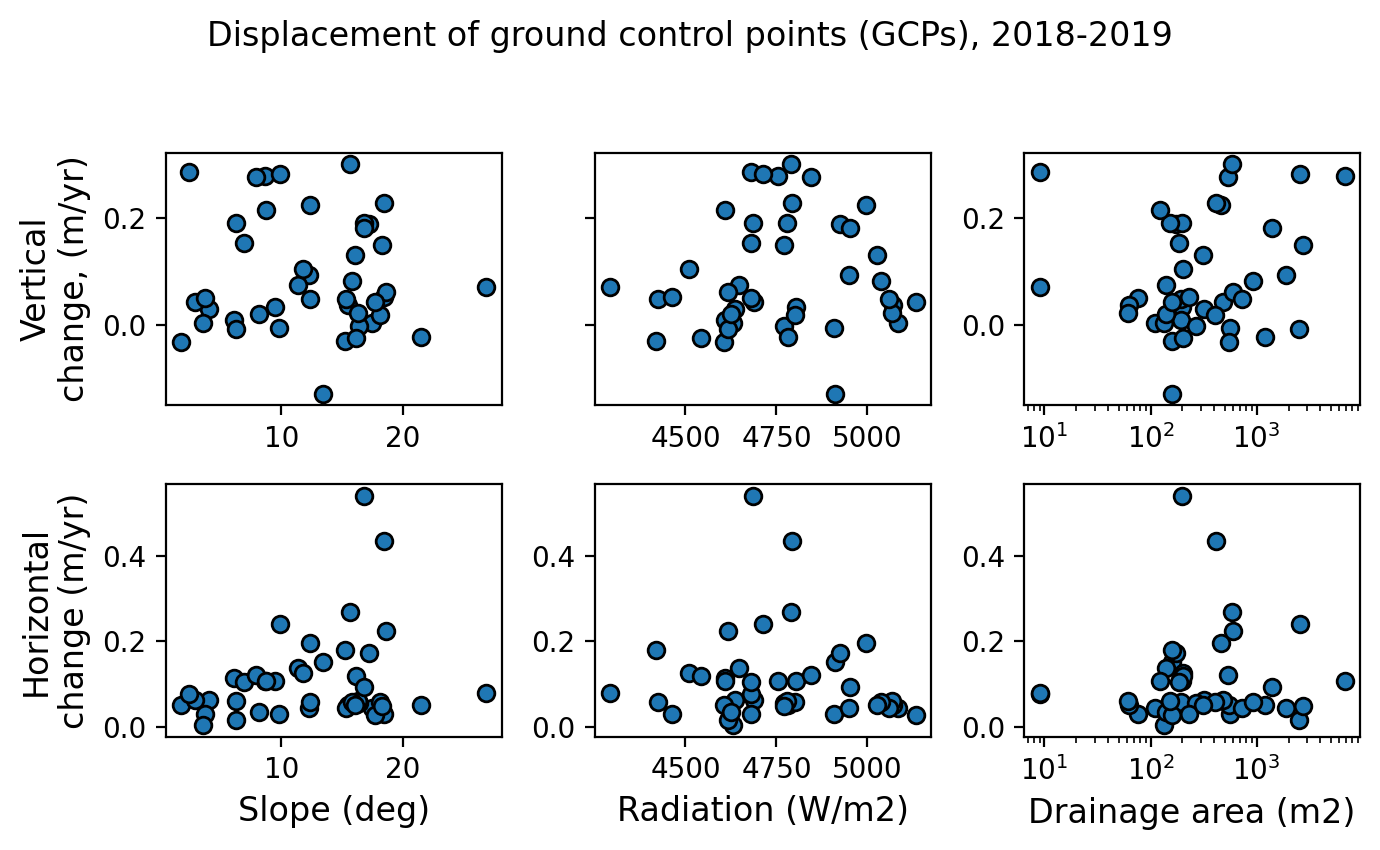

In [253]:
topos = df.columns[-3:]
diffs = ['dElev_1819', 'dDist_1819']


fig, axes = plt.subplots(2,3,figsize=(7,4), dpi=200)


for i, ax in enumerate(axes[0]):
    ax.scatter(x=df[topos[i]],y=(df[diffs[0]]), edgecolor='k')

for i, ax in enumerate(axes[1]):
    ax.scatter(x=df[topos[i]],y=(df[diffs[1]]), edgecolor='k')  
    ax.set_xlabel(topo_labels[i], fontsize=12)

axes[0,0].set_ylabel('Vertical\nchange, (m/yr)', fontsize=12)

axes[1,0].set_ylabel('Horizontal\nchange (m/yr)', fontsize=12)

axes[0,2].set_xscale('log')
axes[1,2].set_xscale('log')

axes[0,1].tick_params(labelleft=False) #Finish this in a loop!

fig.suptitle('Displacement of ground control points (GCPs), 2018-2019', fontsize=12, y=1.05)

fig.tight_layout()
plt.savefig("GCPs_vs_topos.png",  bbox_inches='tight')


In [256]:
df['combined'] = ((df[diffs[0]])**2 + (df[diffs[1]])**2)**0.5

# Don't divide by two here since it's only one year

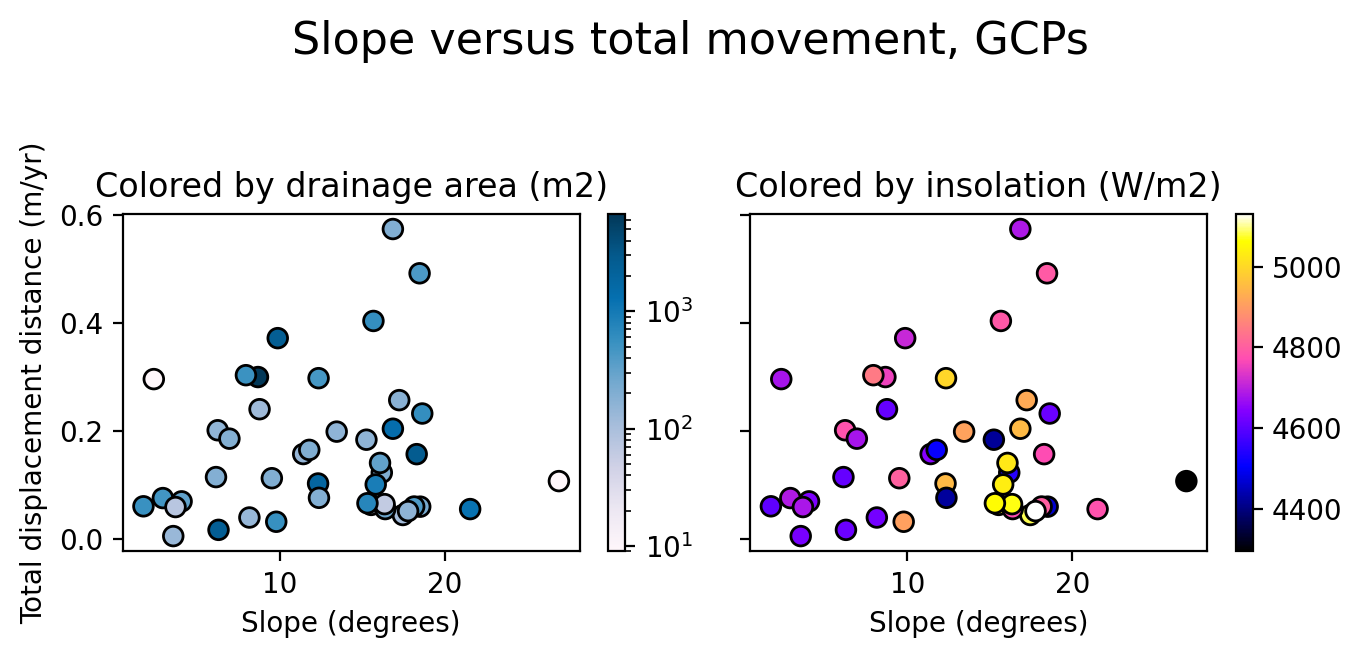

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3), dpi=200, sharey=True)
im = ax1.scatter(df['slope'], y=df['combined'],c=df['flowac3m_1'],cmap='PuBu',norm=colors.LogNorm(), edgecolor='black', s=50)
cb = fig.colorbar(im, ax=ax1)
ax1.set_title('Colored by drainage area (m2)')
im = ax2.scatter(df['slope'],y=df['combined'],c=df['radiation'], cmap='gnuplot2', edgecolor='black', s=50)
cb = fig.colorbar(im, ax=ax2)
ax2.set_title('Colored by insolation (W/m2)');
fig.suptitle('Slope versus total movement, GCPs', fontsize=16, y=1.08)
ax1.set_ylabel('Total displacement distance (m/yr)')
ax1.set_xlabel('Slope (degrees)')
ax2.set_xlabel('Slope (degrees)')
fig.tight_layout()
fig.savefig('GCPs_color_scatters.png', dpi=200,  bbox_inches='tight')



## Lobes

In [258]:
df2 = pd.read_csv(data_path+"Teller_47_Data_dGPS\\T47_targets_extract.csv",na_values='-9999')

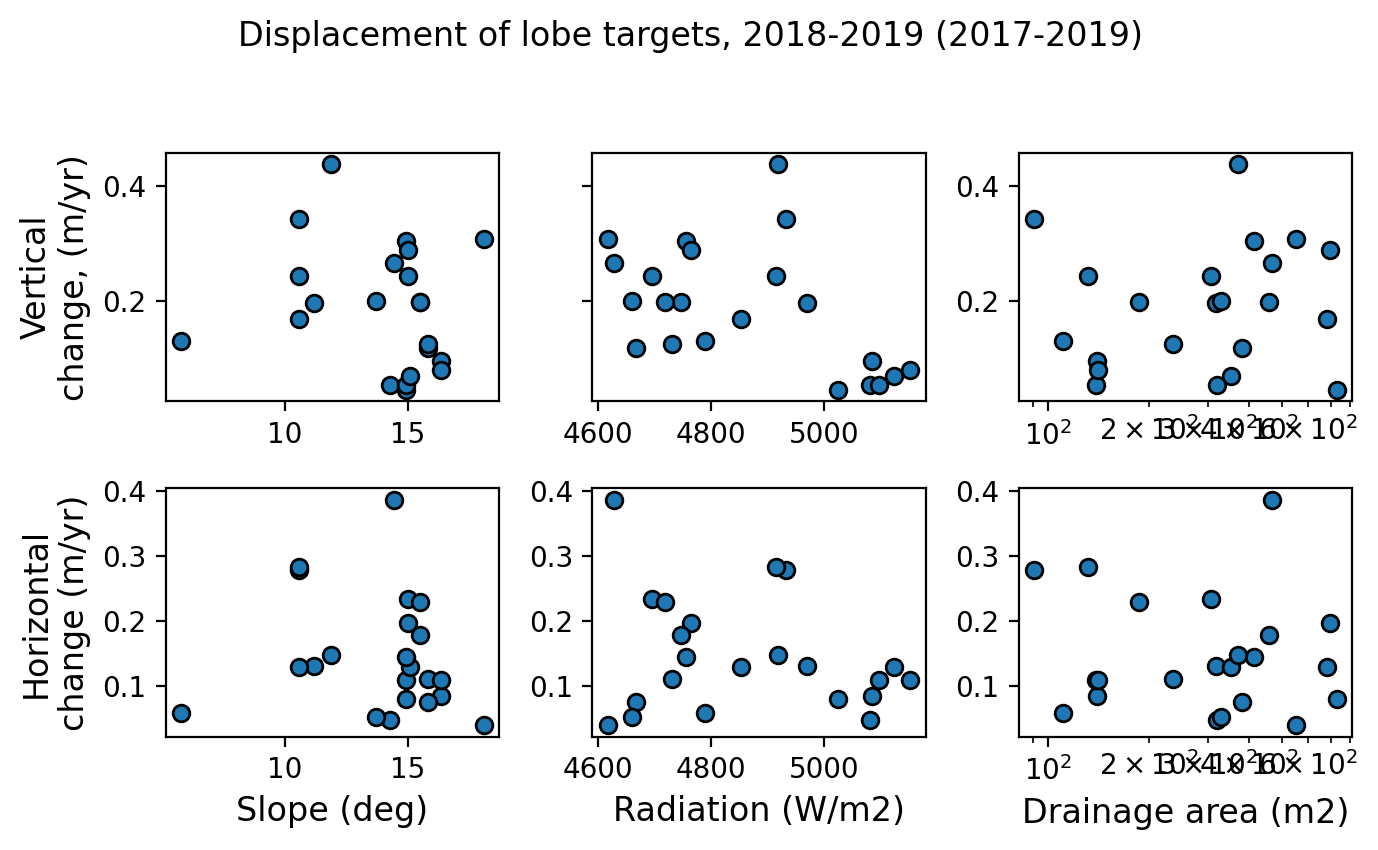

In [259]:
topos2 = df2.columns[-3:]
diffs2 = df2.columns[4:6]

fig, axes = plt.subplots(2,3,figsize=(7,4), dpi=200)


for i, ax in enumerate(axes[0]):
    ax.scatter(x=df2[topos2[i]],y=(df2[diffs2[0]]), edgecolor='k')

   
for i, ax in enumerate(axes[1]):
    ax.scatter(x=df2[topos2[i]],y=(df2[diffs2[1]]), edgecolor='k')  
    ax.set_xlabel(topo_labels[i], fontsize=12)
    

axes[0,0].set_ylabel('Vertical\nchange, (m/yr)', fontsize=12)

axes[1,0].set_ylabel('Horizontal\nchange (m/yr)', fontsize=12)

axes[0,2].set_xscale('log')
axes[1,2].set_xscale('log')

axes[0,1].tick_params(labelleft=False) #Finish this in a loop!

fig.suptitle('Displacement of lobe targets, 2018-2019 (2017-2019)', fontsize=12, y=1.05)

fig.tight_layout()
plt.savefig("Lobes_vs_topos.png", bbox_inches='tight')


In [260]:
df2['combined'] = ((df2[diffs2[0]]/2)**2 + (df2[diffs2[1]]/2)**2)**0.5
# divide by 2 since it's two years of displacement 

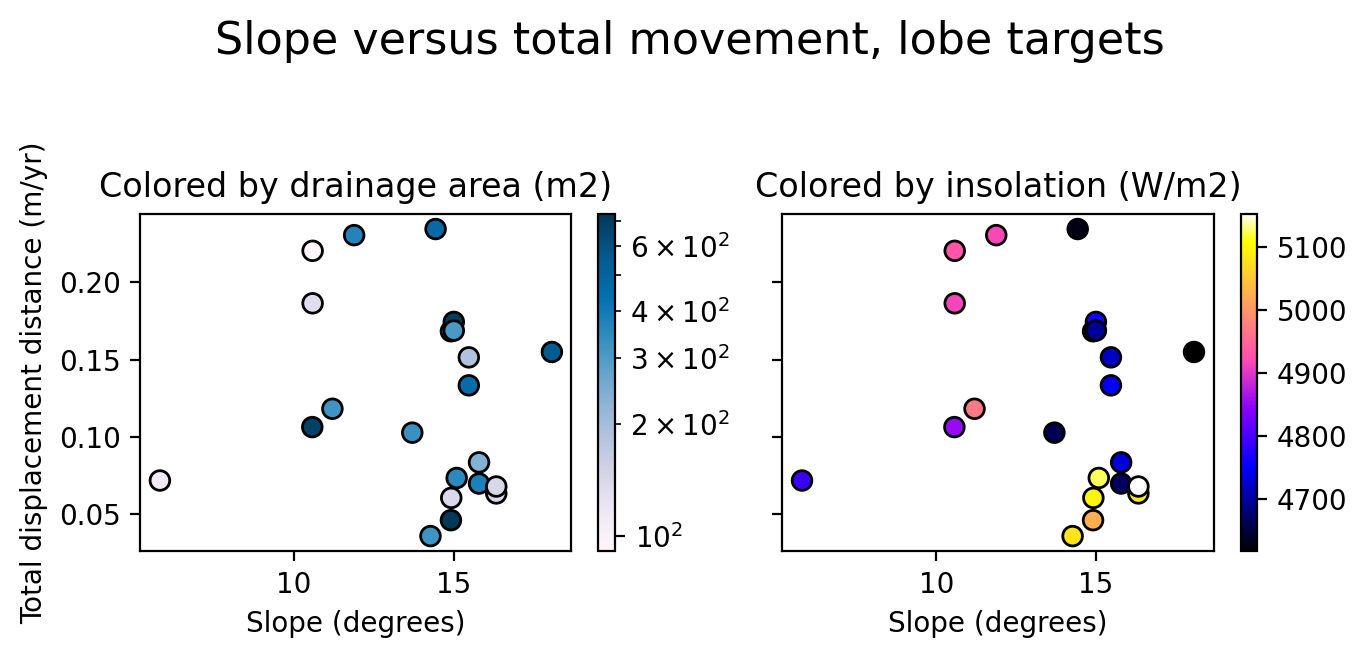

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3), dpi=200, sharey=True)
im = ax1.scatter(x=df2['slope'],y=df2['combined'],c=df2['flowacc'],cmap='PuBu',norm=colors.LogNorm(), edgecolor='black', s=50)
cb = fig.colorbar(im, ax=ax1)
ax1.set_title('Colored by drainage area (m2)')
im = ax2.scatter(x=df2['slope'],y=df2['combined'],c=df2['radiation'],cmap='gnuplot2', edgecolor='black', s=50)
cb = fig.colorbar(im, ax=ax2)
ax2.set_title('Colored by insolation (W/m2)');
fig.suptitle('Slope versus total movement, lobe targets', fontsize=16, y=1.08)
ax1.set_ylabel('Total displacement distance (m/yr)')
ax1.set_xlabel('Slope (degrees)')
ax2.set_xlabel('Slope (degrees)')
plt.tight_layout()
plt.savefig('lobe_color_scatters.png', dpi=200,  bbox_inches='tight')

## Combined target types

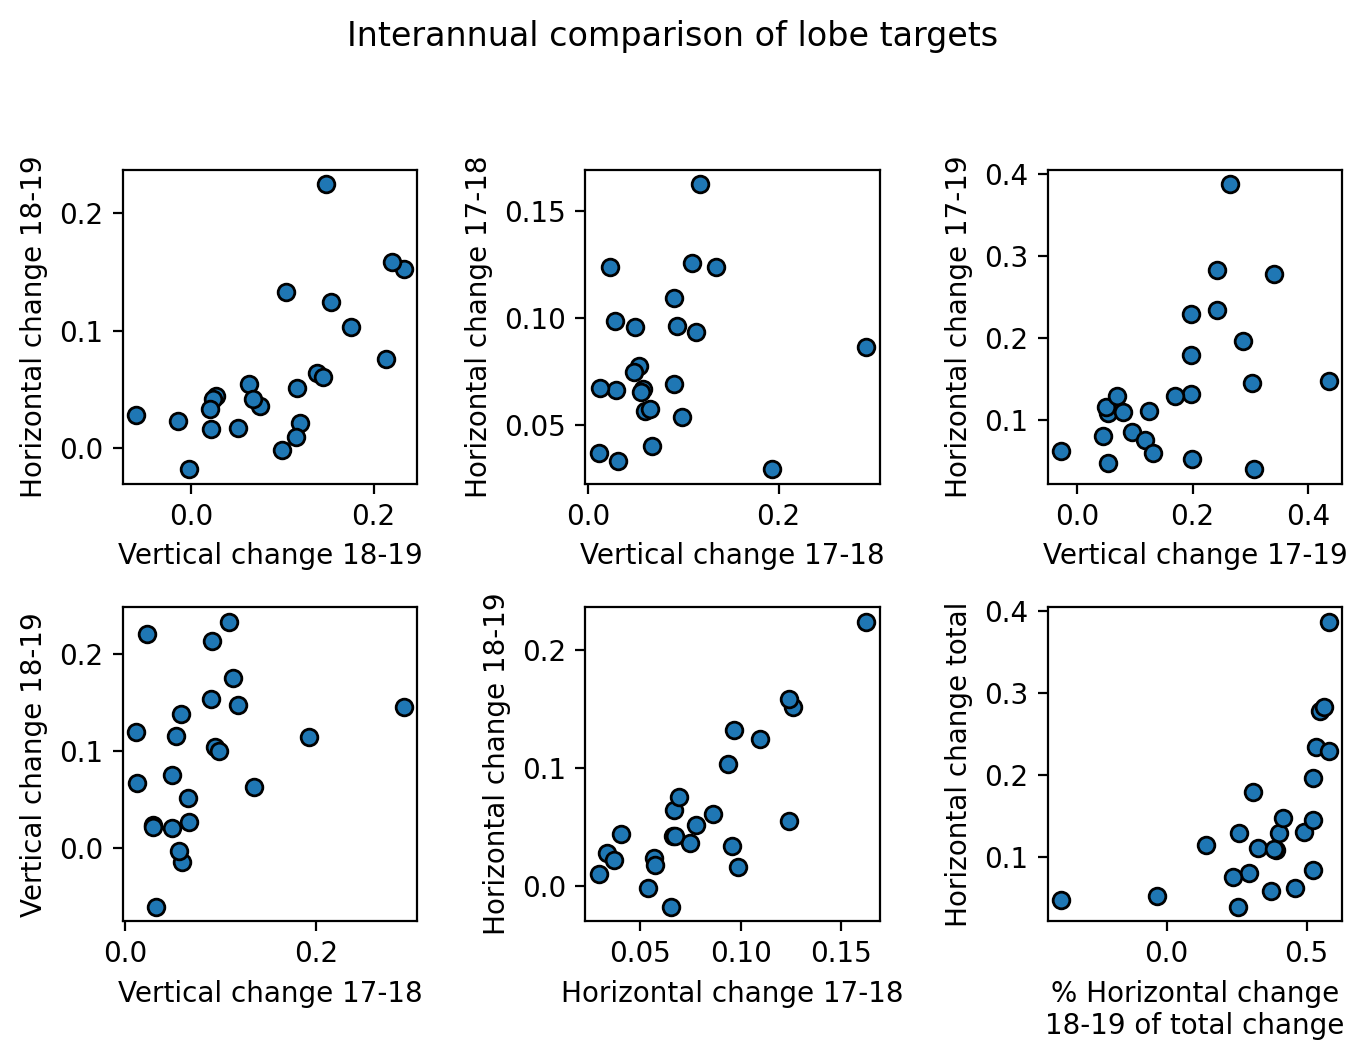

In [262]:
d17_19 = df2.columns[4:6]
d17_18 = df2.columns[7:9]
d18_19 = df2.columns[10:12]

fig, ax = plt.subplots(2,3,figsize=(7,5), dpi=200)
ax[0,2].scatter(x=df2[d17_19[0]],y=df2[d17_19[1]], edgecolor='k')
ax[0,1].scatter(x=df2[d17_18[0]],y=df2[d17_18[1]], edgecolor='k')
ax[0,0].scatter(x=df2[d18_19[0]],y=df2[d18_19[1]], edgecolor='k')
ax[1,0].scatter(x=df2[d17_18[0]],y=df2[d18_19[0]], edgecolor='k')
ax[1,1].scatter(x=df2[d17_18[1]],y=df2[d18_19[1]], edgecolor='k')
ax[1,2].scatter(x=(df2[d18_19[1]]/df2[d17_19[1]]),y=df2[d17_19[1]], edgecolor='k')

ax[0,2].set_xlabel('Vertical change 17-19')
ax[0,1].set_xlabel('Vertical change 17-18')
ax[0,0].set_xlabel('Vertical change 18-19')
ax[1,0].set_xlabel('Vertical change 17-18')
ax[1,1].set_xlabel('Horizontal change 17-18')
ax[1,2].set_ylabel('Horizontal change total')

ax[0,2].set_ylabel('Horizontal change 17-19')
ax[0,1].set_ylabel('Horizontal change 17-18')
ax[0,0].set_ylabel('Horizontal change 18-19')
ax[1,0].set_ylabel('Vertical change 18-19')
ax[1,1].set_ylabel('Horizontal change 18-19')
ax[1,2].set_xlabel('% Horizontal change\n18-19 of total change')

fig.suptitle('Interannual comparison of lobe targets', fontsize=12, y=1.05)
fig.tight_layout()
fig.savefig('lobe_crossplots.png', dpi=200,  bbox_inches='tight')

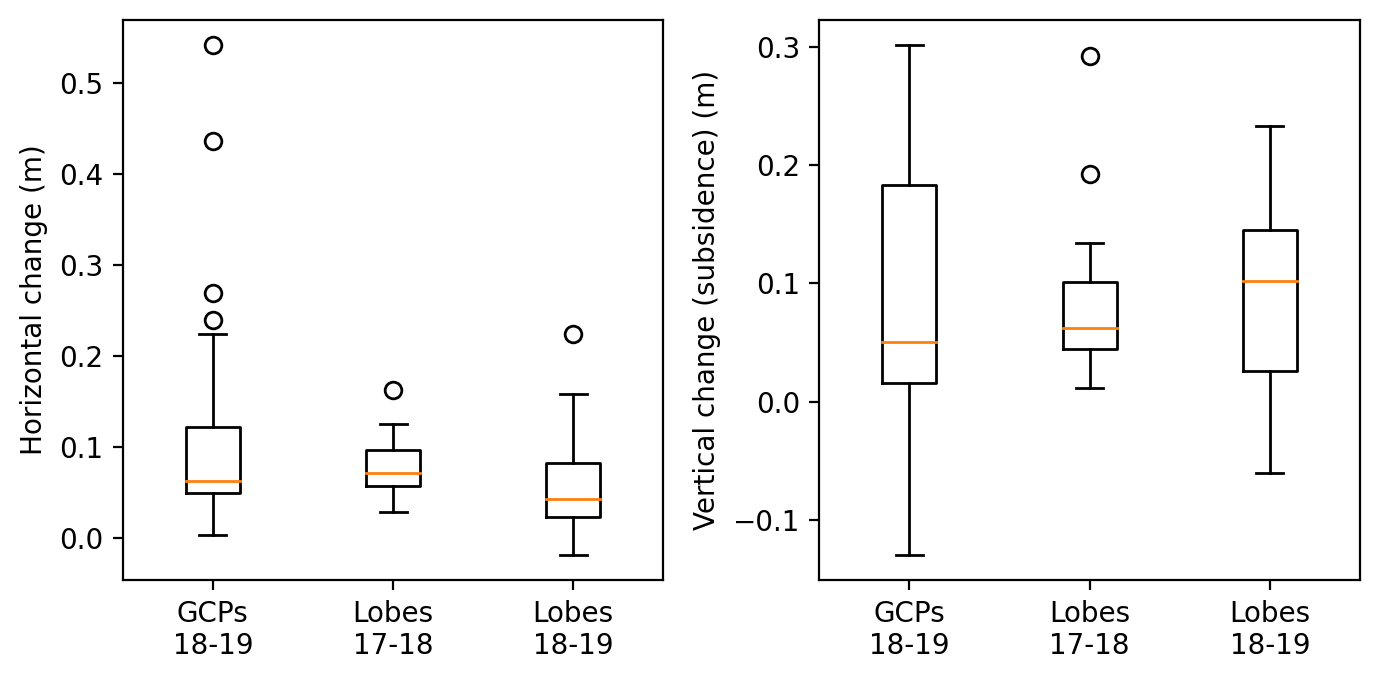

In [263]:
elevation_change = [df['dElev_1819'],  df2[d17_18[0]], df2[d18_19[0]]]

position_change = [df[d18_19[1]], df2[d17_18[1]], df2[d18_19[1]]]

fig, ax = plt.subplots(1,2, figsize=(7,3.5), dpi=200)
ax[0].boxplot(position_change)
ax[0].set_xticklabels(['GCPs\n18-19', 'Lobes\n17-18', 'Lobes\n18-19'])
ax[1].boxplot(elevation_change)
ax[1].set_xticklabels(['GCPs\n18-19', 'Lobes\n17-18', 'Lobes\n18-19'])


ax[0].set_ylabel('Horizontal change (m)')
ax[1].set_ylabel('Vertical change (subsidence) (m)')

fig.tight_layout()
fig.savefig('x_boxplot.png', dpi=200,  bbox_inches='tight')

In [293]:
df2.set_axis(['Name_commo', 'Easting_2019', 'Northing_2019', 'Elevation_2019',
       'dElev_1719 ', 'dDist_1719', 'Vec_1719', 'dElev_1718', 'dDist_1718',
       'Vec_1718', 'dElev_1819', 'dDist_1819', 'slope', 'radiation',
       'flowacc', 'combined'], axis=1, inplace=True)
df.set_axis(['FID', 'Name_commo', 'Easting', 'Northing', 'Elevation_minus_rebar_m',
       'Easting_21', 'Northing_3', 'Elevation1', 'Unnamed: 8', 'dElev_1819',
       'dDist_1819', 'NEAR_DIST', 'NEAR_ANGLE', 'slope', 'radiation',
       'flowacc', 'combined'], axis=1, inplace=True)


In [298]:
all_displacements = pd.merge(df, df2, on=['Name_commo','dElev_1819','dDist_1819','slope','flowacc','combined'],how="outer")
all_displacements.loc[all_displacements['Name_commo'].str.contains("Target"),'type'] = 'lobe'
all_displacements.loc[all_displacements['Name_commo'].str.contains("t2"),'type'] = 'gcp'

In [300]:
all_displacements['dElev_1718']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
63    0.011344
64    0.291983
65    0.012623
66    0.098652
67    0.192820
Name: dElev_1718, Length: 68, dtype: float64

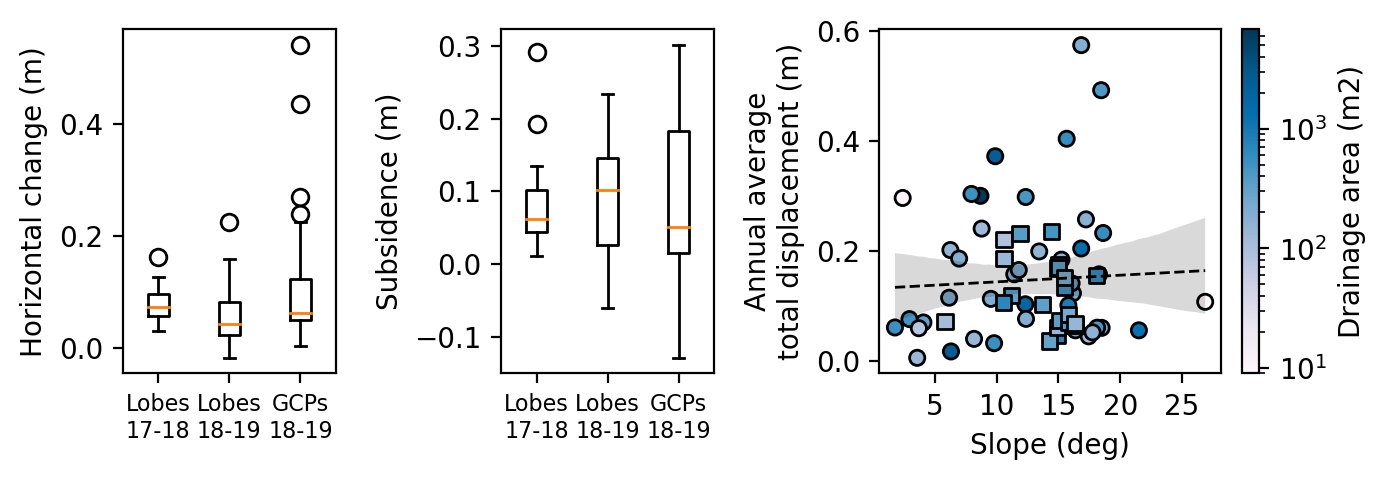

In [365]:
elevation_change = [all_displacements['dElev_1718'].dropna(),
                    all_displacements[all_displacements['type']=='lobe']['dElev_1819'],
                   all_displacements[all_displacements['type']=='gcp']['dElev_1819']]

position_change = [all_displacements['dDist_1718'].dropna(),
                    all_displacements[all_displacements['type']=='lobe']['dDist_1819'],
                   all_displacements[all_displacements['type']=='gcp']['dDist_1819']]

fig, ax = plt.subplots(1,3, figsize=(7,2.5), dpi=200,
                     gridspec_kw={'width_ratios':[1, 1, 2]}
                      )
ax[0].boxplot(position_change)
ax[0].set_xticklabels(['Lobes\n17-18', 'Lobes\n18-19','GCPs\n18-19'], fontsize=8)

ax[1].boxplot(elevation_change)
ax[1].set_xticklabels(['Lobes\n17-18', 'Lobes\n18-19','GCPs\n18-19'], fontsize=8)

markers={"gcp":"o","lobe":"s"}
for typ in markers:
    d = all_displacements[all_displacements['type']==typ]
    im = ax[2].scatter(d['slope'], d['combined'], 
                s = 30, 
                c = d['flowacc'], 
                cmap='PuBu',
               norm=colors.LogNorm(
               vmin=all_displacements['flowacc'].min(),
               vmax=all_displacements['flowacc'].max(),
               ),
                marker = markers[typ],
                edgecolor='k',
               #ax=ax[2]
                 )
    
regression = sns.regplot(x='slope', y='combined',
                         scatter=False,
                        data=all_displacements,
                         line_kws={"color": "black",
                                  "lw":1,
                                  'linestyle':'--'},
                        ax=ax[2])
cb = fig.colorbar(im, ax=ax[2], label="Drainage area (m2)")


# ax[2].scatter(x=all_displacements['slope'],y=all_displacements['combined'],
#               c=all_displacements['flowacc'],
#               cmap='PuBu',
#               norm=colors.LogNorm(),
#               column=[all_displacements['type']],
#               edgecolor='black',
#               s=50)


ax[0].set_ylabel('Horizontal change (m)')
ax[1].set_ylabel('Subsidence (m)')

ax[2].set_ylabel('Annual average\ntotal displacement (m)')
ax[2].set_xlabel('Slope (deg)')

ax[2].locator_params(axis='x', nbins=6)

fig.tight_layout()
#fig.savefig('x_boxplot.png', dpi=200,  bbox_inches='tight')

<AxesSubplot:xlabel='steepness', ylabel='combined'>

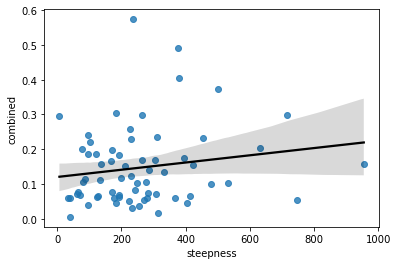

In [362]:
all_displacements['steepness'] = all_displacements['slope'] * (all_displacements['flowacc'] ** (1/2))
sns.regplot(x='steepness', y='combined',
                         scatter=True,
                        data=all_displacements,
                         line_kws={"color": "black"},
                        )

# dGPS map figures

To replace Arc-made maps, under construction

# Insar vs meteo

## New

In [397]:
nome = pd.read_csv(data_path+"Teller_47_Data_Meteo//nome_airport_data_all.csv",header=5, parse_dates=True, index_col="Date").fillna(0)
nome['Year'] = nome.index.year.values
nome['Month'] = nome.index.month.values
nome['doy'] = nome.index.dayofyear.values
nome['Precip_mm'] = nome['Precipitation (in)'] * 25.4
nome['Snow_mm'] = nome['Snowfall (in)'] * 25.4
nome['Temp_Mean_C'] = (nome['Mean Temperature (degF)']-32) * (5/9)
nome['Cum_precip'] = nome.groupby(by="Year")['Precip_mm'].cumsum()
nome['Cum_DDT'] = nome[nome["Temp_Mean_C"] > 0.0].groupby(by="Year")['Temp_Mean_C'].cumcount()

# Get day of year of date of max precip
max_precip_doy = nome.groupby(['Year'])["Precip_mm"].idxmax()
#https://stackoverflow.com/questions/64865421/find-max-by-year-and-return-date-on-which-max-occurred-in-pandas-dataframe
max_precip_doy = max_precip_doy.dropna()


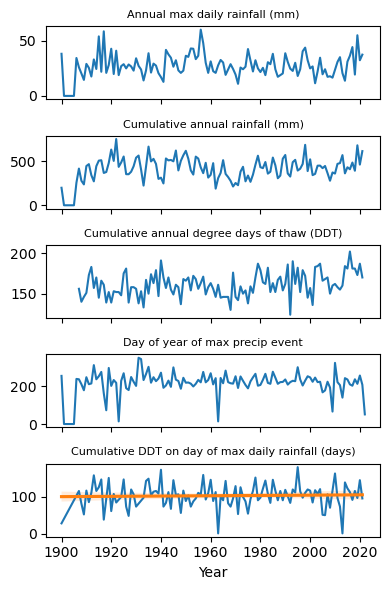

In [399]:
fig, ax = plt.subplots(5,1, figsize=(4,6), sharex=True, dpi=100)
ax[0].plot(nome.groupby(by="Year").max().Precip_mm[:-1])
ax[0].set_title("Annual max daily rainfall (mm)", fontsize=8)
ax[1].plot(nome.groupby(by="Year").max().Cum_precip[:-1])
ax[1].set_title("Cumulative annual rainfall (mm)", fontsize=8)
ax[2].plot(nome.groupby(by="Year").max().Cum_DDT[:-1])
ax[2].set_title("Cumulative annual degree days of thaw (DDT)", fontsize=8)
ax[2].set_ylim(120)
ax[3].plot(nome.loc[max_precip_doy, 'Year'], nome.loc[max_precip_doy, 'doy'])
ax[3].set_title("Day of year of max precip event", fontsize=8)
# Get cumulative degree days of thaw at time of largest rainstorm
sns.lineplot(x=nome.loc[max_precip_doy, 'Year'], y=nome.loc[max_precip_doy, 'Cum_DDT'],ax=ax[4])
sns.regplot(x=nome.loc[max_precip_doy, 'Year'], y=nome.loc[max_precip_doy, 'Cum_DDT'], order=1, scatter=False, ax=ax[4])
ax[4].set_title("Cumulative DDT on day of max daily rainfall (days)", fontsize=8)
ax[4].set_ylabel(None)
fig.tight_layout()
plt.savefig("Nome historical thaw and rainfall.png",  bbox_inches='tight')

In [400]:
# Knowing that InSAR data are on a 12 day cycle we can just get 12-day averages/sums
# https://www.statology.org/pandas-moving-average-by-group
nome['C_mean_12day'] = nome.groupby(['Year'])['Temp_Mean_C'].transform(lambda x: x.rolling(12,1).mean())
nome['P_cum_12day'] = nome.groupby(['Year'])['Precip_mm'].transform(lambda x: x.rolling(12,1).sum())

In [401]:
insar_df = pd.read_csv("insar_site_displacements.csv")
insar_df['J1_diff'] = insar_df.groupby(['year'])['J1'].diff()
insar_df['J2_diff'] = insar_df.groupby(['year'])['J2'].diff()
insar_df['J3_diff'] = insar_df.groupby(['year'])['J3'].diff()
insar_df['J4_diff'] = insar_df.groupby(['year'])['J4'].diff()
insar_df['J5_diff'] = insar_df.groupby(['year'])['J5'].diff()

In [402]:
insar_df['site_composite_mean'] = insar_df[['J1','J2','J3','J4','J5']].mean(axis=1)
insar_df['site_composite_std'] = insar_df[['J1','J2','J3','J4','J5']].std(axis=1)
insar_df['std_pos'] = insar_df['site_composite_mean']+insar_df['site_composite_std']
insar_df['std_neg'] = insar_df['site_composite_mean']-insar_df['site_composite_std']

insar_df['diff_composite_mean'] = insar_df[['J1_diff','J2_diff','J3_diff','J4_diff','J5_diff']].mean(axis=1)
insar_df['diff_composite_std'] = insar_df[['J1_diff','J2_diff','J3_diff','J4_diff','J5_diff']].std(axis=1)


In [403]:
insar_df['Date'] = pd.to_datetime(insar_df['year'] *1000 + insar_df['doy'], format='%Y%j')
insar_df['Date'] = pd.to_datetime(insar_df['Date'], format='%Y-%m-%d')
# originally format='%Y%j'
insar_df.set_index('Date', inplace=True)
insar_df.drop('doy', axis=1, inplace=True)

In [404]:
insar_df.index

DatetimeIndex(['2017-06-03', '2017-06-15', '2017-06-27', '2017-07-09',
               '2017-07-21', '2017-08-02', '2017-08-14', '2017-08-26',
               '2017-09-07', '2017-09-19', '2018-06-10', '2018-06-22',
               '2018-07-16', '2018-07-28', '2018-08-09', '2018-08-21',
               '2018-09-02', '2018-09-14', '2018-09-26', '2019-06-05',
               '2019-06-17', '2019-06-29', '2019-07-11', '2019-07-23',
               '2019-08-04', '2019-08-16', '2019-08-28', '2019-09-09'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [405]:
nome.index

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=44925, freq=None)

In [310]:
# insar_meteo_combined = pd.merge(nome, insar_df, how="outer", left_on=['Year','doy'], right_on=['year','doy'],)
# insar_meteo_combined

In [ ]:
# insar_meteo_combined = pd.merge(nome, insar_df, how="outer", right_index=True, left_index=False,
#                                 left_on="Date"
#                                )
# insar_meteo_combined

In [406]:
insar_meteo_combined = pd.merge(nome, insar_df, how="outer",right_index=True, left_index=True,
                                #on="Date"
                               )
insar_meteo_combined

Precipitation (in)  Mean Temperature (degF)  Snowfall (in)  Year  \
Date                                                                           
1900-01-01                 0.0                      0.0            0.0  1900   
1900-01-02                 0.0                      0.0            0.0  1900   
1900-01-03                 0.0                      0.0            0.0  1900   
1900-01-04                 0.0                      0.0            0.0  1900   
1900-01-05                 0.0                      0.0            0.0  1900   
...                        ...                      ...            ...   ...   
2022-12-27                 0.0                      0.0            0.0  2022   
2022-12-28                 0.0                      0.0            0.0  2022   
2022-12-29                 0.0                      0.0            0.0  2022   
2022-12-30                 0.0                      0.0            0.0  2022   
2022-12-31                 0.0                      0.0            0.0  2022   

            Month  doy  Precip_mm  Snow_mm  Temp_Mean_C  Cum_precip  ...  \
Date                                                                 ...   
1900-01-01      1    1        0.0      0.0   -17.777778       0.000  ...   
1900-01-02      1    2        0.0      0.0   -17.777778       0.000  ...   
1900-01-03      1    3        0.0      0.0   -17.777778       0.000  ...   
1900-01-04      1    4        0.0      0.0   -17.777778       0.000  ...   
1900-01-05      1    5        0.0      0.0   -17.777778       0.000  ...   
...           ...  ...        ...      ...          ...         ...  ...   
2022-12-27     12  361        0.0      0.0   -17.777778      21.844  ...   
2022-12-28     12  362        0.0      0.0   -17.777778      21.844  ...   
2022-12-29     12  363        0.0      0.0   -17.777778      21.844  ...   
2022-12-30     12  364        0.0      0.0   -17.777778      21.844  ...   
2022-12-31     12  365        0.0      0.0   -17.777778      21.844  ...   

            J2_diff  J3_diff  J4_diff  J5_diff  site_composite_mean  \
Date                                                                  
1900-01-01      NaN      NaN      NaN      NaN                  NaN   
1900-01-02      NaN      NaN      NaN      NaN                  NaN   
1900-01-03      NaN      NaN      NaN      NaN                  NaN   
1900-01-04      NaN      NaN      NaN      NaN                  NaN   
1900-01-05      NaN      NaN      NaN      NaN                  NaN   
...             ...      ...      ...      ...                  ...   
2022-12-27      NaN      NaN      NaN      NaN                  NaN   
2022-12-28      NaN      NaN      NaN      NaN                  NaN   
2022-12-29      NaN      NaN      NaN      NaN                  NaN   
2022-12-30      NaN      NaN      NaN      NaN                  NaN   
2022-12-31      NaN      NaN      NaN      NaN                  NaN   

            site_composite_std  std_pos  std_neg  diff_composite_mean  \
Date                                                                    
1900-01-01                 NaN      NaN      NaN                  NaN   
1900-01-02                 NaN      NaN      NaN                  NaN   
1900-01-03                 NaN      NaN      NaN                  NaN   
1900-01-04                 NaN      NaN      NaN                  NaN   
1900-01-05                 NaN      NaN      NaN                  NaN   
...                        ...      ...      ...                  ...   
2022-12-27                 NaN      NaN      NaN                  NaN   
2022-12-28                 NaN      NaN      NaN                  NaN   
2022-12-29                 NaN      NaN      NaN                  NaN   
2022-12-30                 NaN      NaN      NaN                  NaN   
2022-12-31                 NaN      NaN      NaN                  NaN   

            diff_composite_std  
Date                            
1900-01-01                 NaN  
1900-01-0

In [320]:
insar_meteo_combined.columns

Index(['Precipitation (in)', 'Mean Temperature (degF)', 'Snowfall (in)',
       'Year', 'Month', 'doy', 'Precip_mm', 'Snow_mm', 'Temp_Mean_C',
       'Cum_precip', 'Cum_DDT', 'C_mean_12day', 'P_cum_12day', 'Unnamed: 0',
       'year', 'J1', 'J2', 'J3', 'J4', 'J5', 'J1_diff', 'J2_diff', 'J3_diff',
       'J4_diff', 'J5_diff', 'site_composite_mean', 'site_composite_std',
       'std_pos', 'std_neg', 'diff_composite_mean', 'diff_composite_std',
       'Date'],
      dtype='object')

### Now plot

Text(0, 0.5, 'movement between sat passes')

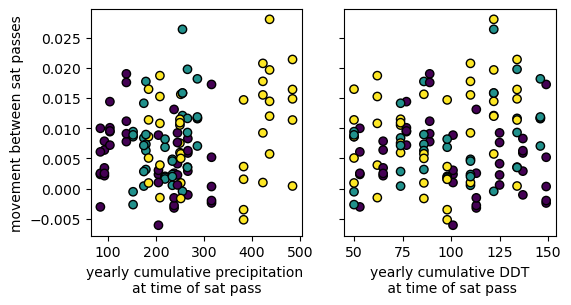

In [407]:
fig, ax = plt.subplots(1,2, figsize=(6,3), dpi=100, sharey=True)
for i, site in enumerate(['J1_diff','J2_diff','J3_diff','J4_diff','J5_diff']):
    im = ax[0].scatter(insar_meteo_combined['Cum_precip'],insar_meteo_combined[site],c=insar_meteo_combined['year'],cmap='viridis',edgecolor='k')
    im2 = ax[1].scatter(insar_meteo_combined['Cum_DDT'],insar_meteo_combined[site],c=insar_meteo_combined['year'],cmap='viridis',edgecolor='k')
ax[0].set_xlabel("yearly cumulative precipitation \nat time of sat pass")
ax[1].set_xlabel("yearly cumulative DDT\n at time of sat pass")
ax[0].set_ylabel("movement between sat passes")

Text(0, 0.5, 'movement between sat passes')

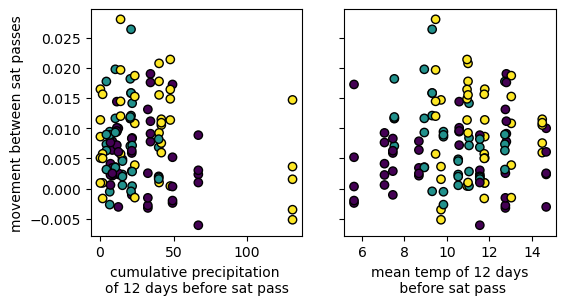

In [408]:
fig, ax = plt.subplots(1,2, figsize=(6,3), dpi=100, sharey=True)
for i, site in enumerate(['J1_diff','J2_diff','J3_diff','J4_diff','J5_diff']):
    im = ax[0].scatter(insar_meteo_combined['P_cum_12day'],insar_meteo_combined[site],c=insar_meteo_combined['year'],cmap='viridis',edgecolor='k')
    im2 = ax[1].scatter(insar_meteo_combined['C_mean_12day'],insar_meteo_combined[site],c=insar_meteo_combined['year'],cmap='viridis',edgecolor='k')
ax[0].set_xlabel("cumulative precipitation \nof 12 days before sat pass")
ax[1].set_xlabel("mean temp of 12 days\n before sat pass")
ax[0].set_ylabel("movement between sat passes")

C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


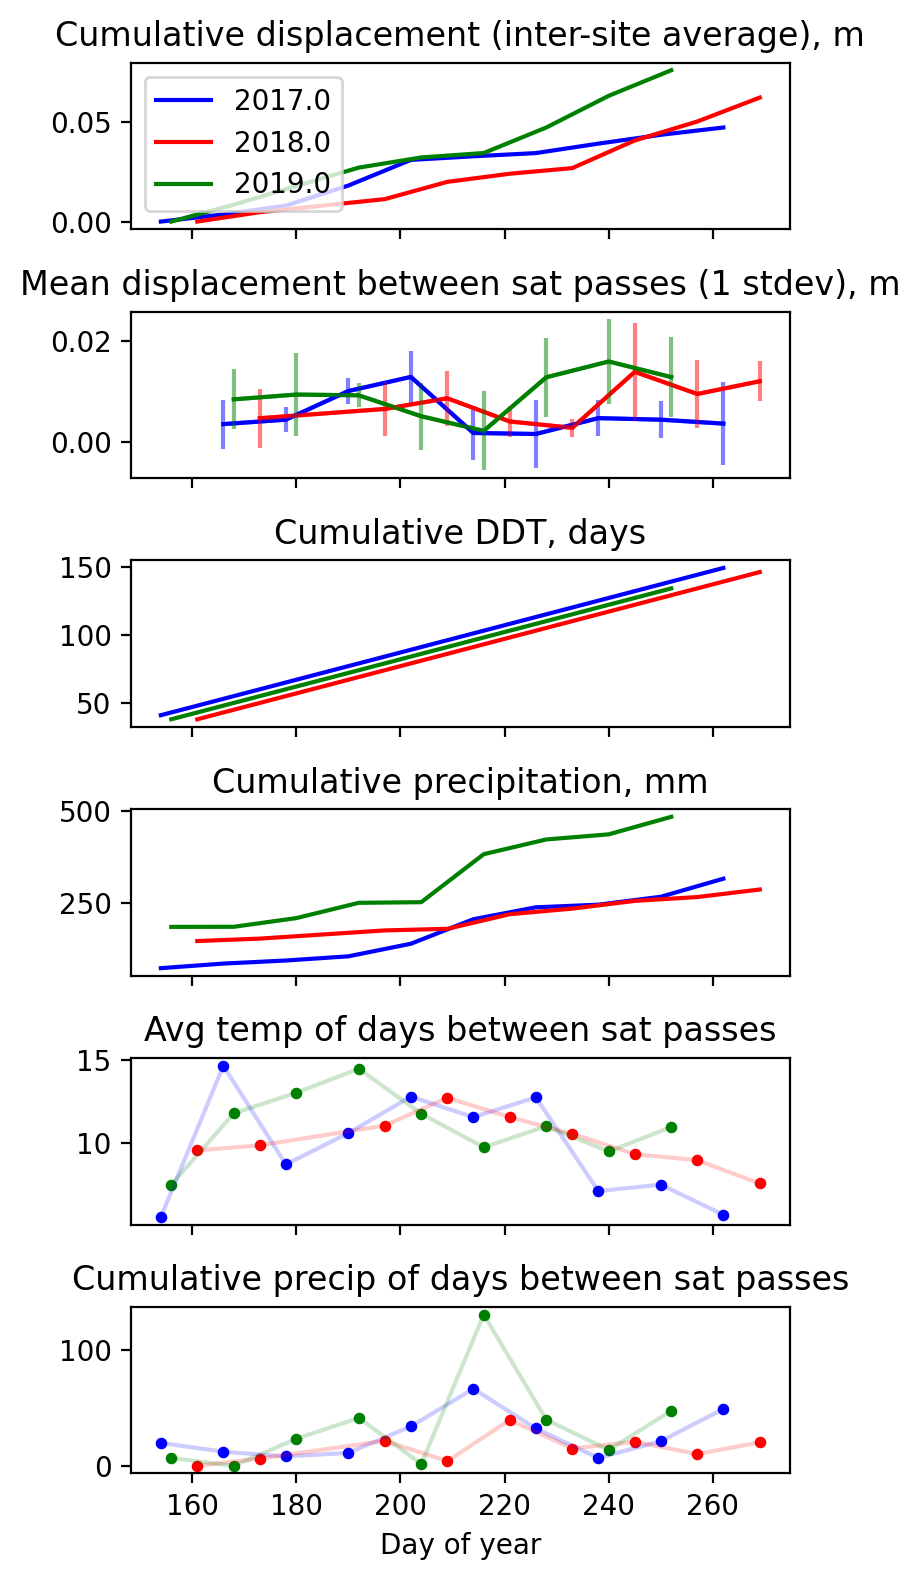

In [428]:
colorlist = ['b','r','g']

fig, ax = plt.subplots(6,1, figsize=(4,8), dpi=200, sharex=True)

for i, (year, group) in enumerate(insar_meteo_combined.groupby(by='year')):
    ax[0].plot(group['doy'], group['site_composite_mean'], c=colorlist[i], label=year)
    ax[0].set_title("Cumulative displacement (inter-site average), m")
    ax[0].legend()
    ax[1].plot(group['doy'], group['diff_composite_mean'], c=colorlist[i])
    ax[1].set_title("Mean displacement between sat passes (1 stdev), m")
    ax[1].errorbar(group['doy'], group['diff_composite_mean'], yerr=group['diff_composite_std'], alpha=.5, c=colorlist[i])
    ax[2].plot(group['doy'], group['Cum_DDT'], c=colorlist[i])
    ax[2].set_title("Cumulative DDT, days")    
    ax[3].plot(group['doy'], group['Cum_precip'], c=colorlist[i])
    ax[3].set_title("Cumulative precipitation, mm")
    ax[4].scatter(group['doy'], group['C_mean_12day'], c=colorlist[i], s=10)
    ax[4].plot(group['doy'], group['C_mean_12day'], c=colorlist[i], alpha=0.2)
    ax[4].set_title("Avg temp of days between sat passes")
    ax[5].scatter(group['doy'], group['P_cum_12day'], c=colorlist[i], s=10)
    ax[5].plot(group['doy'], group['P_cum_12day'], c=colorlist[i], alpha=0.2)
    ax[5].set_title("Cumulative precip of days between sat passes")
    ax[5].set_xlabel("Day of year")
    #ax.errorbar(group['doy'], group['site_composite_mean'], yerr=group['site_composite_mean']+group['diff_composite_std'])
fig.tight_layout()
plt.savefig("New insar vs meteo.png")

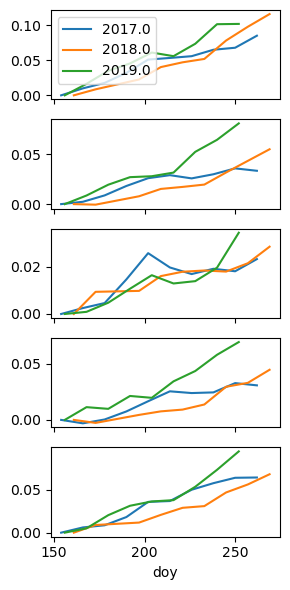

In [204]:
fig, ax = plt.subplots(5,1, figsize=(3,6), dpi=100, sharex=True)
for i, site in enumerate(['J1','J2','J3','J4','J5']):
    for j, year in insar_meteo_combined.groupby(by='year'):

        # site_info = nwis.get_record(sites=site, service='site')
        # To do - get name and drainage area as label instead of station label!
        if i == 0:
            year.plot(x='doy', y=site, ax=ax[i],
                      #legend=False,
                      label=j
                     )
        else:
            year.plot(x='doy', y=site, ax=ax[i],
                      legend=False,
                      #label=j
                     )
fig.tight_layout()

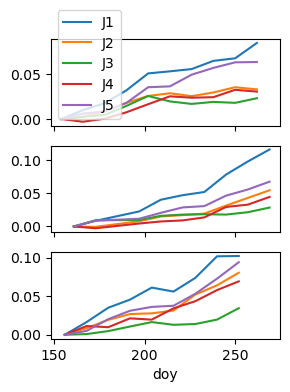

In [206]:
fig, ax = plt.subplots(3,1, figsize=(3,4), dpi=100, sharex=True)
for j, (extra, year) in enumerate(insar_meteo_combined.groupby(by='year')):
    for i, site in enumerate(['J1','J2','J3','J4','J5']):


        # site_info = nwis.get_record(sites=site, service='site')
        # To do - get name and drainage area as label instead of station label!
        if j == 0:
            year.plot(x='doy', y=site,
                      ax=ax[j],
                      #legend=False,
                      label=site
                     )
        else:
            year.plot(x='doy', y=site, ax=ax[j],
                      legend=False,
                      #label=j
                     )
fig.tight_layout()

## Just 2017-2019 data, probably should be replaced by querying complete dataset in 4.2

In [ ]:
dfd = pd.read_csv(data_path+"insar_displacements.csv",index_col='Year',parse_dates=True)
dfc = pd.read_csv(data_path+"Nome_climate_data.csv",index_col='Date',parse_dates=True)

In [ ]:
for i,yr in enumerate(['2017','2018','2019']):
    dfc.loc[yr,'Precip cumsum in'] = dfc.loc[yr,'Precipitation (Inches)'].cumsum()
    dfc.loc[yr, 'Precip cumsum mm'] = dfc.loc[yr,'Precip cumsum in'] * 25.4
    dfc.loc[yr, 'Mean Temp (C)'] = (dfc.loc[yr,'Mean Temp (F)'] - 32) * (5/9)
    dfc.loc[yr,'Mean rolling F'] = dfc.loc[yr,'Mean Temp (F)'].rolling(5).mean()
    dfc.loc[yr,'Mean rolling C'] = (dfc.loc[yr,'Mean rolling F'] - 32) * (5/9)
    #dfc.loc[yr,'Departure, mean rolling'] = dfc.loc[yr,'Mean Temp (F)'] - dfc.loc[yr,'Mean Temp (F)'].rolling(5).mean()
    
dfc['Precip, mm'] = dfc['Precipitation (Inches)']*25.4

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(3.5,4.5),dpi=200,sharex=True,gridspec_kw={'height_ratios':[1.5,2,1]})

for i,yr in enumerate(['2017','2018','2019']):
    dfc[yr].plot(ax=ax[2],x='doy',y='Mean Temp (C)',legend=False)

    
for i,yr in enumerate(['2017','2018','2019']):
    dfc[yr].plot(ax=ax[1],x='doy',y='Precip cumsum mm',legend=False)

ax[1].set_ylim(0, dfc['Precip cumsum mm'].max()*2.5)

ax2=ax[1].twinx()

for i,yr in enumerate(['2017','2018','2019']):
    dfc[yr].plot(ax=ax2,x='doy',y='Precip, mm',legend=False)

ax2.set_ylim(dfc['Precip, mm'].max()*2,0)
ax2.set_ylabel('Precip, mm/day',rotation=270, labelpad=10, fontsize=8)
ax2.set_yticks([0, 30, 60])
    
for i,yr in enumerate(['2017','2018','2019']):
    dfd[yr].plot(ax=ax[0],x='doy',y='W',marker=".",markersize="10",label=yr)

ax[0].set_xlim(160,250)
ax[0].set_ylabel('Total displacement, m', fontsize=8)
ax[0].legend(loc='upper left',ncol=3,fontsize=7, bbox_to_anchor=(0.0, 1.3))
ax[1].set_ylabel('Cumulative\nprecipitation, mm', fontsize=8)
ax[1].set_yticks([0, 150, 300])
ax[2].set_ylabel('Daily mean\ntemp (C)', fontsize=8)
ax[2].set_xlabel('Day of year')

fig.tight_layout()
fig.savefig('InSAR_vs_weather_data.png', dpi=200)


In [ ]:
dfc['doy_Year'] = dfc.index.year.values
dfd['doy_Year'] = dfd.index.year.values

In [ ]:
df_combined = pd.merge(dfc, dfd, how="outer", on=['doy_Year','doy'])
df_combined.to_csv("InSAR_plus_weather_data.csv")

Still to do: try a scatter plot with InSAR displacement vs cumulative rainfall, average temp leading up to day of measurement 

In [ ]:
# Something like, cumulative rainfall and net temp change between indices where insar data isn't nan 

## All historical Nome data

In [ ]:
nome = pd.read_csv(data_path+"Teller_47_Data_Meteo//nome_airport_data_all.csv",header=5, parse_dates=True, index_col="Date")

In [ ]:
# Get day of year of date of max precip
idx = nome.groupby(['Year'])["Precip_mm"].idxmax()
#https://stackoverflow.com/questions/64865421/find-max-by-year-and-return-date-on-which-max-occurred-in-pandas-dataframe
idx = idx.dropna()


In [ ]:
nome['Year'] = nome.index.year.values
nome['Month'] = nome.index.month.values
nome['doy'] = nome.index.dayofyear.values

In [ ]:
nome['Precip_mm'] = nome['Precipitation (in)'] * 25.4
nome['Snow_mm'] = nome['Snowfall (in)'] * 25.4
nome['Temp_Mean_C'] = (nome['Mean Temperature (degF)']-32) * (5/9)

In [ ]:
nome['Cum_precip'] = nome.groupby(by="Year")['Precip_mm'].cumsum()

In [ ]:
nome['Cum_DDT'] = nome[nome["Temp_Mean_C"] > 0.0].groupby(by="Year")['Temp_Mean_C'].cumcount()

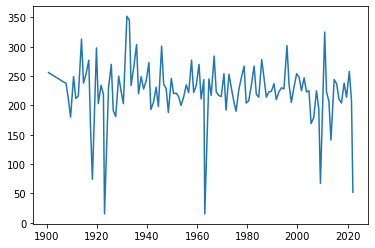

In [84]:
# Get day of year of date of max precip
idx = nome.groupby(['Year'])["Precip_mm"].idxmax()
#https://stackoverflow.com/questions/64865421/find-max-by-year-and-return-date-on-which-max-occurred-in-pandas-dataframe
idx = idx.dropna()
plt.plot(nome.loc[idx, 'doy'])

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(4,6), sharex=True, dpi=100)
ax[0].plot(nome.groupby(by="Year").max().Precip_mm[:-1])
ax[0].set_title("Annual max daily rainfall (mm)", fontsize=8)
ax[1].plot(nome.groupby(by="Year").max().Cum_precip[:-1])
ax[1].set_title("Cumulative annual rainfall (mm)", fontsize=8)
ax[2].plot(nome.groupby(by="Year").max().Cum_DDT[:-1])
ax[2].set_title("Cumulative annual degree days of thaw (DDT)", fontsize=8)
ax[2].set_ylim(120)
# Get cumulative degree days of thaw at time of largest rainstorm
sns.lineplot(x=nome.loc[idx, 'Year'], y=nome.loc[idx, 'Cum_DDT'],ax=ax[3])
sns.regplot(x=nome.loc[idx, 'Year'], y=nome.loc[idx, 'Cum_DDT'], order=1, scatter=False, ax=ax[3])
ax[3].set_title("Cumulative DDT on day of max daily rainfall (days)", fontsize=8)
ax[3].set_ylabel(None)
fig.tight_layout()
plt.savefig("Nome historical thaw and rainfall.png",  bbox_inches='tight')

In [ ]:
# Just for fun here's the fit since the 80

In [ ]:
nome_80 = nome.loc[nome['Year']> 1979]

idx = nome_80.groupby(['Year'])["Precip_mm"].idxmax()
#https://stackoverflow.com/questions/64865421/find-max-by-year-and-return-date-on-which-max-occurred-in-pandas-dataframe
idx = idx.dropna()

In [ ]:
sns.regplot(x=nome_80.loc[idx, 'Year'], y=nome.loc[idx, 'Cum_DDT'], order=1)

# Slope stability

[SHALSTAB model of Montgomery and Dietrich (1994)](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/93WR02979?casa_token=vJQ2NGNS82oAAAAA:obDGuoYXpnRkNKJfjXDhhWeQpUtJEy79XBb_eaRFalD2iSjzrXz5JUh_5_1y91WT1Qn3INazspBQllc) and constants to compare against [Mithan et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020GL092264?casa_token=KJynib3aO6kAAAAA%3AxN8ZEirJAHu_58RXNywm_r2wlYQtc0i44WpvXrCJDgA3Rimlc_7NleBwcRR5CDDJ3WqrpYq3xhZq8g) 

## Load rasters

In [68]:
slope = rasterio.open("new_slope_2m.tif", masked=True)
slope_data=slope.read(1)
slope_data[slope_data < 0.0] =np.nan
drainage_area = rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_acc.tif', masked=True)
a = drainage_area.read(1).astype(np.float32)
a[a < 0.0] =np.nan
a[a == 0.0] =1e-7

## SHALSTAB

In [620]:
slope_normal_soil_thickness = np.cos(np.radians(slope_data))

 #flow accumulation [m^2] (flow acc currently in pixels,
#would mutliply by 2 for drainage area in m2 since 2m DEM but since
#'b' is length of countour also 2 m, they cancel out)

q_aug = .05; #[m/day] rain Aug 2 2020
z = 1; #active layer thickness, [m]
tanphi = .84; # original; tan (40 degrees) i think??? internal angle of friction
s_w_dens = 2; #ratio of density of saturated soil to water 
Ksat_maybe = 2.2; #m/day if 1/3 is organic and 2/3 is mineral 

##For reference, Mithan et al used:
# tanphi = 0.48 (for 26 degrees) and tanphi=0.32 (for 18 degrees), Harris and Lewkowicz (2000). 
# s_w_dens = 1.88 (H and L)
# z=1.5 (Harris et al. 2008)
#Ksat = 9 E-4 to 9 E-1 (Anderson and Anderson)

q_T = q_aug / (Ksat_maybe * z * np.cos(np.radians(slope_data)))

W = q_aug * a * (Ksat_maybe * z * np.cos(np.radians(slope_data))) * np.sin(np.radians(slope_data))

q_cr_T = ((np.sin(np.radians(slope_data)) * (s_w_dens)) / a ) * (1 -  (np.tan(np.radians(slope_data)) / tanphi));
#critical rainfall / transmissivity

q_cr_K = ((np.sin(np.radians(slope_data)) * (s_w_dens)) / a ) * (1 -  (np.tan(np.radians(slope_data)) / tanphi)) * z * slope_normal_soil_thickness;
#critical rainfall / hydraulic conductivity [T = K cos(theta) z]

k_aug_crit = q_aug / ((np.sin(np.radians(slope_data)) * (s_w_dens)) / a )* (1 -  (np.tan(np.radians(slope_data)) / tanphi)) * z * slope_normal_soil_thickness;
#hydraulic conductivity that just crosses failure threshold for Aug 2
#rainfall event

q_cr= ((np.sin(np.radians(slope_data)) * (s_w_dens)) / a ) * (1 -  (np.tan(np.radians(slope_data)) / tanphi)) * z * slope_normal_soil_thickness * Ksat_maybe;

# Make critical rainfall mm for plotting 
q_cr_plot=q_cr*1000

# Make zeros very smol so logarithms work
q_cr_plot[q_cr_plot <= 0.0] = 1E-7

# Make critical rainfall mm for plotting 
q_cr_T_plot=q_cr_T*1000

# Make zeros very smol so logarithms work
q_cr_T_plot[q_cr_T_plot <= 0.0] = 1E-7

# with rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_dem.tif') as src:
#     out_meta = src.meta.copy()
#     with rasterio.open("q_cr.tif","w",**out_meta) as dest:
#         dest.write(q_cr_plot,1)
with rasterio.open("new_slope_2m.tif", masked=True) as src:
    out_meta = src.meta.copy()
    with rasterio.open("q_cr.tif","w",**out_meta) as dest:
        dest.write(q_cr_plot,1)

In [373]:
from matplotlib import colors

from matplotlib import cm
viridis = cm.get_cmap('plasma', 8)
newcolors = viridis(np.linspace(0, 1, 7))
withblack = np.vstack(([0.,0.,0.,1.0], newcolors))


# make a color map of fixed colors
cmap = colors.ListedColormap(withblack)
bounds=np.hstack((np.linspace(0,60,7), [61]))
norm = colors.BoundaryNorm(bounds, cmap.N)

C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


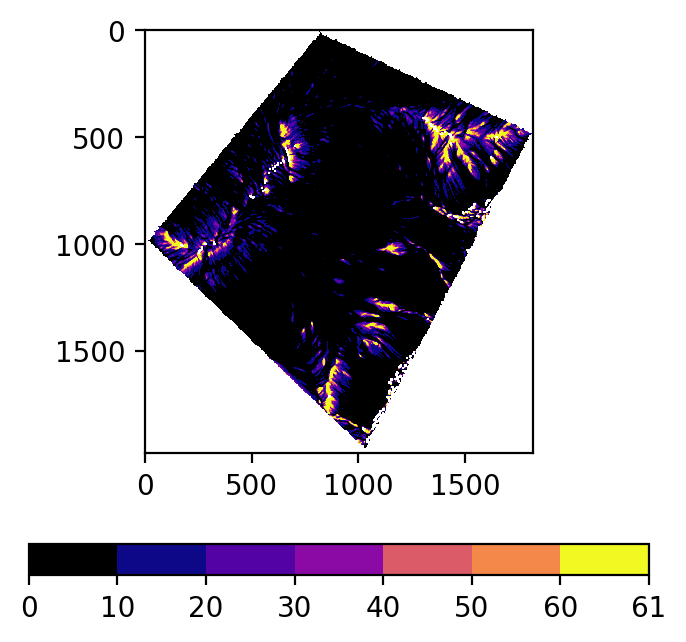

In [377]:
test = gpd.read_file(data_path+'Teller_47_Data_Shapefiles\\poly_failure_TL47_2018_jcr.shp')
test= test.to_crs('epsg:32603')
test["area (m2)"] = test['geometry'].area

UAS = gpd.read_file(data_path+'Teller_47_Data_Shapefiles\\2018UASExtent.shp')
UAS= UAS.to_crs('epsg:32603')
UAS["area (m2)"] = UAS['geometry'].area
UAS.to_file(data_path+'Teller_47_Data_Shapefiles\\failures_12N')

slope = rasterio.open('new_slope.tif', masked=True)

poly_extent = np.asarray(UAS.geometry.total_bounds)[[0,2,1,3]]
test_bounds = np.asarray(slope.bounds)[[0,2,1,3]]*3

with rasterio.open('new_slope.tif', masked=True) as slope:
    with rasterio.open("q_cr.tif") as q_cr:
        fig, ax = plt.subplots(figsize=(4,4), dpi=200)
        im0 = rasterio.plot.show(slope, cmap='binary', vmin=0, vmax=45,  ax=ax, zorder=0)
        im1 = rasterio.plot.show(q_cr, cmap=cmap, norm=norm,
                                 #vmin=10, vmax=60,
                                 ax=ax, alpha=0.4, zorder=1)
        qcr_colors = ax.imshow(q_cr.read(1), cmap=cmap, norm=norm,
                               #vmin=10, vmax=60
                              )
        fig.colorbar(qcr_colors, ax=ax, orientation='horizontal')
        
        #plt.savefig("q_cr.png")

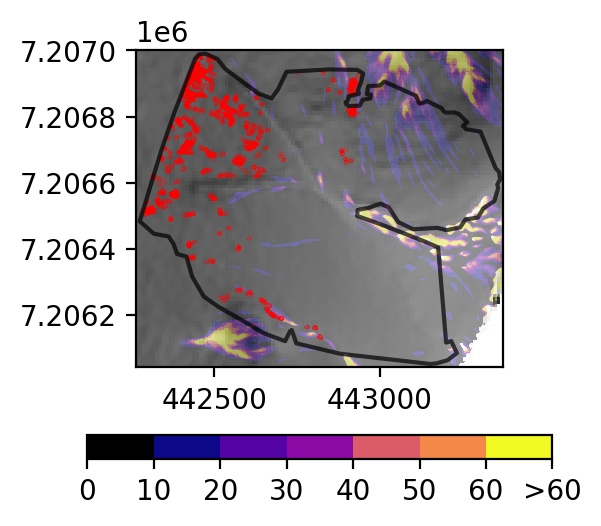

In [393]:
with rasterio.open('new_slope.tif', masked=True) as slope:
    with rasterio.open("q_cr.tif") as q_cr:      
        fig, ax = plt.subplots(figsize=(3,3), dpi=200)
        slopecolors = ax.imshow(slope.read(1), vmin=0, vmax=30, 
                                 cmap='Greys')
        im0 = rasterio.plot.show(slope, cmap='binary', vmin=0, vmax=45, extent=poly_extent, ax=ax, zorder=0)
        qcr_colors = ax.imshow(q_cr.read(1), cmap=cmap, norm=norm,
                               #vmin=10, vmax=60
                              )
        im1 = rasterio.plot.show(q_cr,cmap=cmap, norm=norm, 
                                 #vmin=10, vmax=60,
                                 extent=poly_extent, ax=ax, alpha=0.4, zorder=1)
        b1 = test.boundary.plot(ax=ax, color='r', alpha=0.7, zorder=2)
        b2 = UAS.boundary.plot(ax=ax, color='k', alpha=0.7, zorder=2)
        ax.set_ylim(poly_extent[2]-10,poly_extent[3]+10)
        ax.set_xlim(poly_extent[0]-10,poly_extent[1]+10)
        cbar = fig.colorbar(qcr_colors, ax=ax, orientation='horizontal')
        mod_ticks = cbar.ax.get_xticks().astype(int).astype(str)
        mod_ticks[-1:] = '>60'
        cbar.ax.set_xticklabels(mod_ticks)
        
        #plt.savefig("q_cr_zoom.png")

C:\Users\f005dv1\AppData\Local\Temp\ipykernel_2128\1551230111.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(q_T))


(array([[ 5.,  0.,  1., ...,  0.,  0.,  0.],
        [ 7.,  0.,  0., ...,  0.,  0.,  0.],
        [ 5.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [15.,  1.,  0., ...,  0.,  0.,  0.],
        [15.,  1.,  0., ...,  0.,  0.,  0.],
        [14.,  1.,  1., ...,  0.,  0.,  0.]]),
 array([-3.7841897 , -2.8910875 , -1.9979856 , -1.1048834 , -0.21178141,
         0.68132067,  1.5744227 ,  2.4675248 ,  3.360627  ,  4.253729  ,
         5.146831  ], dtype=float32),
 <a list of 1818 BarContainer objects>)

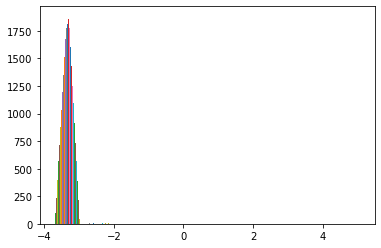

In [622]:
q_T[q_T == 0.0] = 1e-7
plt.hist(np.log(q_T))

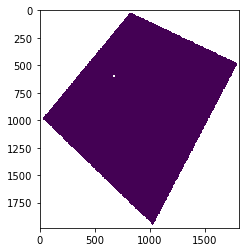

In [619]:
plt.imshow(q_T,vmin=171.0, vmax=172.0)

(array([[4., 0., 0., ..., 1., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        ...,
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [4., 0., 0., ..., 1., 0., 0.]]),
 array([-16.118095  , -13.991603  , -11.86511   ,  -9.738618  ,
         -7.612125  ,  -5.485632  ,  -3.3591394 ,  -1.232647  ,
          0.89384574,   3.0203383 ,   5.146831  ], dtype=float32),
 <a list of 1818 BarContainer objects>)

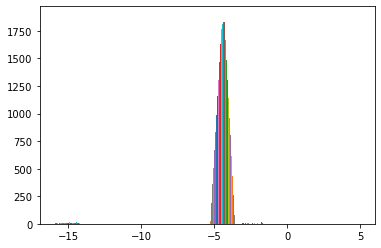

In [603]:
plt.hist(np.log(q_T))

In [606]:
qt_digi = np.digitize((np.log(q_cr_T_plot)), np.array(np.arange(-0.0,25.0,5)), right=True)


(array([[  11.,    0.,    0., ...,    0.,    0., 1968.],
        [  11.,    0.,    0., ...,    0.,    0., 1968.],
        [  11.,    0.,    0., ...,    0.,    0., 1968.],
        ...,
        [  20.,    0.,    0., ...,    0.,    0., 1959.],
        [  20.,    0.,    0., ...,    0.,    0., 1959.],
        [  20.,    0.,    0., ...,    0.,    0., 1959.]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 1818 BarContainer objects>)

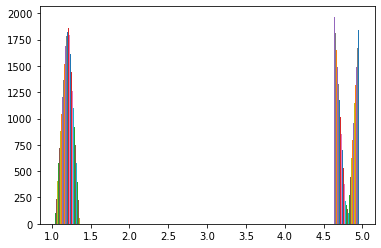

In [607]:
plt.hist(qt_digi)

C:\Users\f005dv1\AppData\Local\Temp\ipykernel_2128\1477805661.py:40: RuntimeWarning: invalid value encountered in log
  qt_colors = ax[1].imshow(np.log(q_T), cmap='viridis',
C:\Users\f005dv1\AppData\Local\Temp\ipykernel_2128\1477805661.py:44: RuntimeWarning: invalid value encountered in log
  im2 = rasterio.plot.show(np.log(q_T), transform=q_cr.transform,


(442250.0, 443250.0)

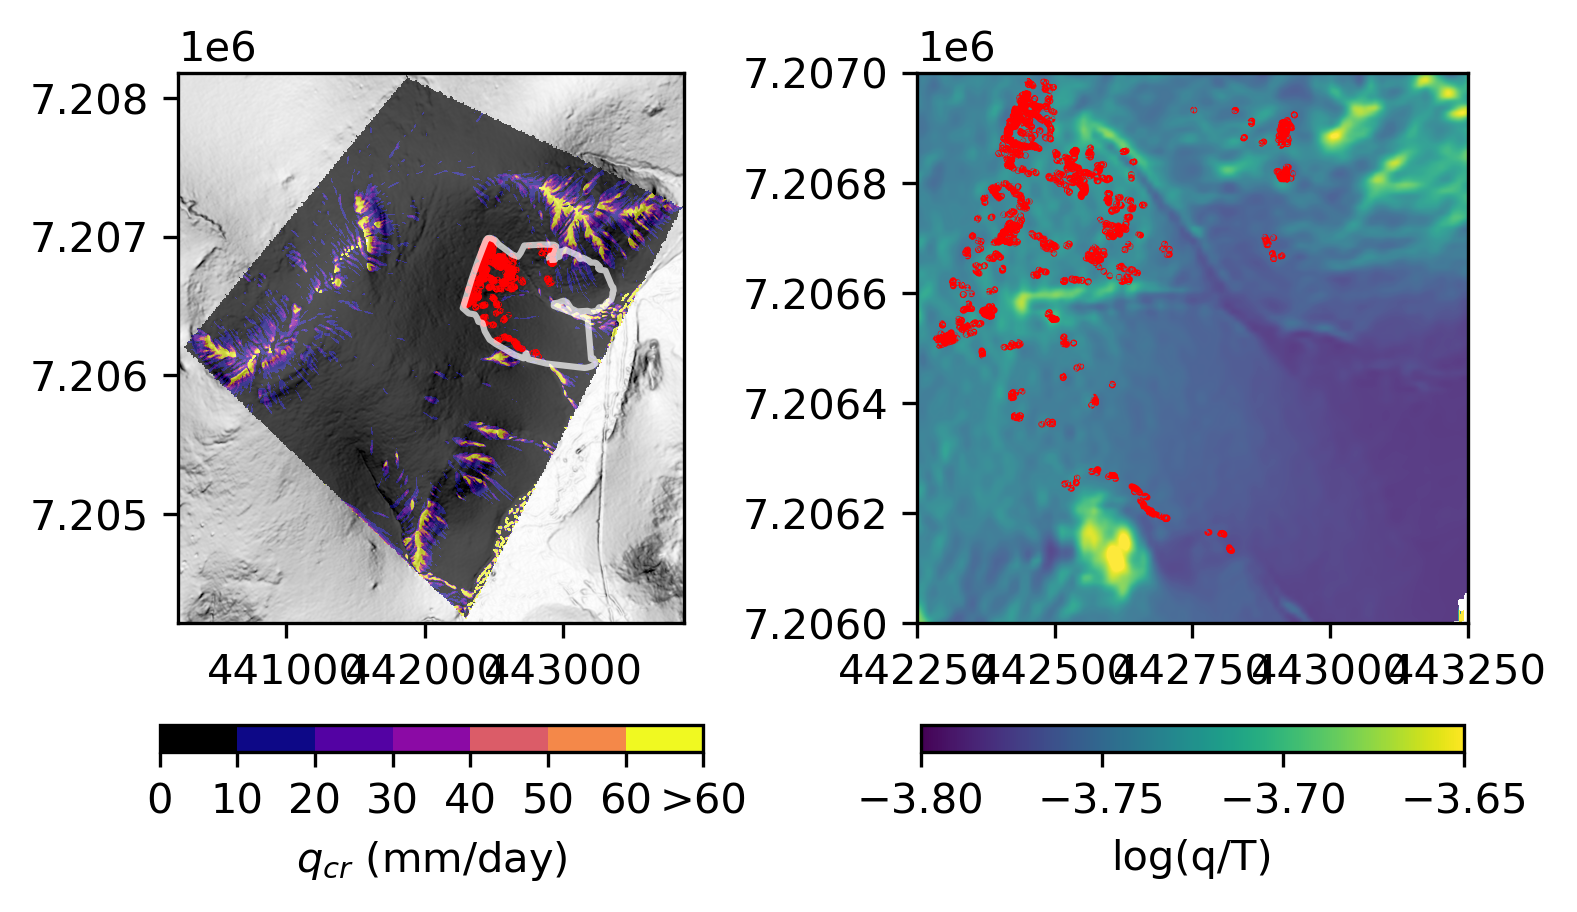

In [639]:
extent_slope=[slope.bounds[0], slope.bounds[2], slope.bounds[1], slope.bounds[3]]
poly_extent = np.asarray(UAS.geometry.total_bounds)[[0,2,1,3]]
test_bounds = np.asarray(slope.bounds)[[0,2,1,3]]*3

import numpy.ma as ma
fig, ax = plt.subplots(1,2, figsize=(6,3),dpi=300)
im0 = rasterio.plot.show(t47_slope, extent=extent_slope,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax[0])

with rasterio.open("q_cr.tif", masked=True) as q_cr:      
    qcr_colors = ax[0].imshow(q_cr.read(1), cmap=cmap, norm=norm,
                           #vmin=10, vmax=60
                          )
    im1 = rasterio.plot.show(q_cr,cmap=cmap, norm=norm, 
                             #vmin=10, vmax=60,
                             extent=extent_slope,
                             ax=ax[0], alpha=0.67,
                             zorder=1)
b1 = test.boundary.plot(ax=ax[0], color='r', zorder=2)
b2 = UAS.boundary.plot(ax=ax[0],  color='white', alpha=0.7, zorder=2)

cbar = fig.colorbar(qcr_colors, ax=ax[0], orientation='horizontal',
                    label='$q_{cr}$ (mm/day)',
                    fraction=0.04,
                    #pad=0.1
                   )
mod_ticks = cbar.ax.get_xticks().astype(int).astype(str)
mod_ticks[-1:] = '>60'
cbar.ax.set_xticklabels(mod_ticks)

ax[0].set_ylim(extent_slope[2]-10,extent_slope[3]+10)
ax[0].set_xlim(extent_slope[0]-10,extent_slope[1]+10)

with rasterio.open("q_cr.tif", masked=True) as q_cr:      
    qt_colors = ax[1].imshow(np.log(q_T), cmap='viridis',
                             vmin=-3.8,
                             vmax=-3.65,
                          )
    im2 = rasterio.plot.show(np.log(q_T), transform=q_cr.transform,
                             cmap='viridis',
                             #norm=LogNorm(), 
                             vmin=-3.8,
                             vmax=-3.65,
                             extent=extent_slope,
                             ax=ax[1], alpha=0.9,
                             zorder=0)
b1 = test.boundary.plot(ax=ax[1], color='r', zorder=1)

cbar = fig.colorbar(qt_colors, ax=ax[1], orientation='horizontal',
                    label='log(q/T)',
                    fraction=0.04,
                    #pad=0.1
                   )
# mod_ticks = cbar.ax.get_xticks().astype(int).astype(str)
# mod_ticks[-1:] = '>60'
# cbar.ax.set_xticklabels(mod_ticks)

ax[1].set_ylim(7.2060e6,7.2070e6)
ax[1].set_xlim(442250,443250)



In [456]:
np.log(q_cr_T_plot)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [406]:
np.nanmean(slope_masked)

11.7854395

In [ ]:
steepness = slope_data * np.sqrt(a)

with rasterio.open("steepness.tif","w",**out_meta) as dest:
    dest.write(steepness,1)

## Load failure polygons

In [520]:
test = gpd.read_file(data_path+'Teller_47_Data_Shapefiles\\poly_failure_TL47_2018_jcr.shp')
test= test.to_crs('epsg:32603')
test["area (m2)"] = test['geometry'].area

UAS = gpd.read_file(data_path+'Teller_47_Data_Shapefiles\\2018UASExtent.shp')
UAS= UAS.to_crs('epsg:32603')
UAS["area (m2)"] = UAS['geometry'].area
UAS.to_file(data_path+'Teller_47_Data_Shapefiles\\failures_12N')

slope = rasterio.open('new_slope.tif', masked=True) 

#Only keep polygons > 2m2 since that's the resolution of the raster
#bigpolys = test[test["area (m2)"]>2.0]
#eh, unclear if needed u know


#https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


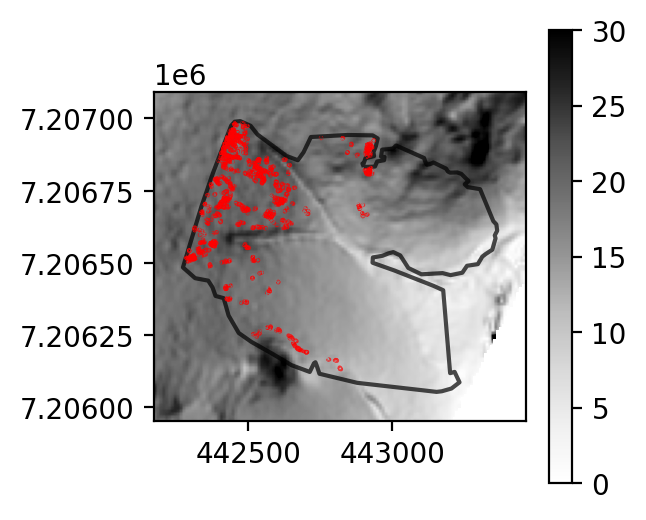

In [521]:
poly_extent = np.asarray(UAS.geometry.total_bounds)[[0,2,1,3]]
test_bounds = np.asarray(slope.bounds)[[0,2,1,3]]*3

fig, ax = plt.subplots(figsize=(3,3), dpi=200)
imx = ax.imshow(slope.read(1), vmin=0, vmax=30, 
                         cmap='Greys')
im0 = rasterio.plot.show(slope, cmap='binary', vmin=0, vmax=30, extent=test_bounds, ax=ax, zorder=0)                            
im1 = test.boundary.plot(ax=ax, color='r', alpha=0.7, zorder=2)
im2 = UAS.boundary.plot(ax=ax, color='k', alpha=0.7, zorder=1)
ax.set_ylim(poly_extent[2]-100,poly_extent[3]+100)
ax.set_xlim(poly_extent[0]-100,poly_extent[1]+100)
fig.colorbar(imx, ax=ax)

In [522]:
dinf_raster = rxr.open_rasterio(data_path+'Teller_47_Data_Rasters\\t47_acc.tif', masked=True)

da_clipped = dinf_raster.rio.clip(UAS.geometry)

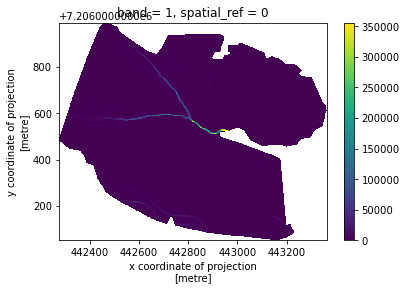

In [523]:
da_clipped.plot()

In [524]:
# Get  all coordinates in 2 m dinf raster

(X_c, Y_c) = np.meshgrid(da_clipped.x.values, da_clipped.y.values)

X_c = X_c.reshape((np.prod(X_c.shape),))
Y_c = Y_c.reshape((np.prod(Y_c.shape),))

coords = [(x,y) for x, y in zip(X_c, Y_c)]


In [525]:
from shapely.geometry import Point
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in coords]
points = GeoDataFrame(coords, crs="EPSG:32603", geometry=geometry)

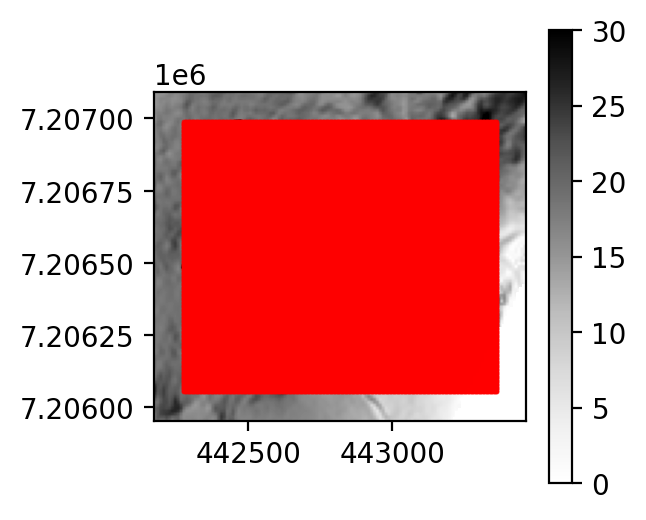

In [526]:
poly_extent = np.asarray(UAS.geometry.total_bounds)[[0,2,1,3]]
test_bounds = np.asarray(slope.bounds)[[0,2,1,3]]*3

fig, ax = plt.subplots(figsize=(3,3), dpi=200)
imx = ax.imshow(slope.read(1), vmin=0, vmax=30, 
                         cmap='Greys')
im0 = rasterio.plot.show(slope, cmap='binary', vmin=0, vmax=30, extent=test_bounds, ax=ax, zorder=0)                            
im1 = test.boundary.plot(ax=ax, color='k', alpha=0.7, zorder=2)
im2 = UAS.boundary.plot(ax=ax, color='k', alpha=0.7, zorder=1)
im3 = points.plot(ax=ax, color='r', alpha=0.7, markersize=.1, zorder=3)
ax.set_ylim(poly_extent[2]-100,poly_extent[3]+100)
ax.set_xlim(poly_extent[0]-100,poly_extent[1]+100)
fig.colorbar(imx, ax=ax)

In [527]:
df_points = pd.DataFrame()

In [528]:
import fiona
import rasterio
import rasterio.mask

with fiona.open(data_path+'Teller_47_Data_Shapefiles\\failures_12N', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
with rasterio.open('new_slope.tif', masked=True) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open('new_slope_clipped.tif', "w", **out_meta) as dest:
    dest.write(out_image)
    
with fiona.open(data_path+'Teller_47_Data_Shapefiles\\failures_12N', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
with rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_acc.tif', masked=True) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_acc_clipped.tif', "w", **out_meta) as dest:
    dest.write(out_image)

CPLE_AppDefinedError: Deleting E:/Del_Vecchio_OneDrive/OneDrive - Dartmouth College/NGEE_projects/Teller_47/Teller_47_Data/Teller_47_Data_Rasters/t47_acc_clipped.tif failed: Permission denied

In [529]:
raster = rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_acc_clipped.tif', masked=True)
src = raster
df_points['dinf'] = [x[0] for x in src.sample(coords)]
print('done dinf')
raster.close()

raster = rasterio.open('new_slope_clipped.tif', masked=True)
src = raster
df_points['slope'] = [x[0] for x in src.sample(coords)]
raster.close()

done dinf


In [530]:
df_points = df_points[df_points['dinf'] > 0.0]

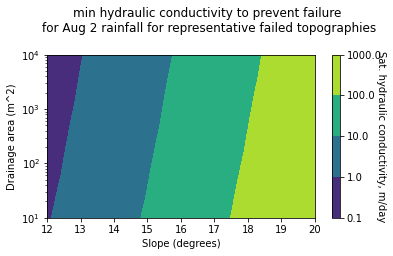

In [531]:
#slopes - between 14 and 20
#DA - between 0 and 2000
pts=20
slope_array=np.linspace(12,20,num=pts)
da_array=np.geomspace(1e1,1e4,num=pts)
slope_normal_array = np.cos(np.radians(slope_array))
k_aug_crit_matrix=np.zeros((pts,pts))

for i in range(len(slope_array)):
    for j in range(len(da_array)):
        k_aug_crit_matrix[i,j] = q_aug / ((np.sin(np.radians(slope_array[i])) *
                       (s_w_dens)) / da_array[j] )* (1 -  (np.tan(np.radians(slope_array[i])) / tanphi)) * z * slope_normal_array[i];

##Explore this param scape as function of soil thickness
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(6,3))
CS = ax.contourf(slope_array,da_array,k_aug_crit_matrix,locator=ticker.LogLocator())
#ax.clabel(CS, inline=1)
ax.set_yscale('log')
cbar = fig.colorbar(CS)
fig.suptitle('min hydraulic conductivity to prevent failure \nfor Aug 2 rainfall for representative failed topographies',y=1.1)
plt.xlabel('Slope (degrees)')
plt.ylabel('Drainage area (m^2)')
cbar.set_label('Sat. hydraulic conductivity, m/day', rotation=270)

### Get mapped failures shapefile and turn them into points. 

In [532]:
polys_2018 = gpd.read_file(data_path+'Teller_47_Data_Shapefiles\\poly_failure_TL47_2018_jcr.shp')
polys_2018 = polys_2018.to_crs('epsg:32603')
polys_2018["area (m2)"] = polys_2018['geometry'].area

#Only keep polygons > 2m2 since that's the resolution of the raster
#bigpolys = test[test["area (m2)"]>2.0]
#eh, unclear if needed u know


#https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

In [533]:
#Need to reproject shapefile to match raster

polys_2018= polys_2018.to_crs('epsg:32603')
polys_2018
#Also want to use a broader measure of slope 



id                                           geometry  area (m2)
0     None  POLYGON ((442283.890 7206514.921, 442283.890 7...   0.707943
1     None  POLYGON ((442285.570 7206518.136, 442286.120 7...   1.176804
2     None  POLYGON ((442289.552 7206517.296, 442289.666 7...   0.330015
3     None  POLYGON ((442290.211 7206519.910, 442290.392 7...   2.545543
4     None  POLYGON ((442295.598 7206514.683, 442295.692 7...   0.442713
...    ...                                                ...        ...
1190  None  POLYGON ((442644.747 7206239.200, 442644.828 7...   0.131855
1191  None  POLYGON ((442390.056 7206605.254, 442390.435 7...   0.874568
1192  None  POLYGON ((442384.815 7206602.911, 442385.018 7...   0.280764
1193  None  POLYGON ((442380.292 7206602.342, 442380.522 7...   0.146709
1194  None  POLYGON ((442333.084 7206597.149, 442333.084 7...   1.892498

[1195 rows x 3 columns]

In [534]:
import glob
polys_2019_dir = "C:\\Users\\joanm\OneDrive - Dartmouth College\\NGEE_projects\\Teller_47\\Teller_47_Data\\Teller_47_Data_Shapefiles\\Adjusted_2019_2alginwith2018"

polys_2019_list = glob.glob(polys_2019_dir+ "/**/*.shp",
                           recursive=True)

In [536]:
polys_2019_list

[]

In [535]:
shapes_to_concat = list(range(len(polys_2019_list)))
for i in range(len(polys_2019_list)):
    shapes_to_concat[i] = gpd.read_file(polys_2019_list[i])
polys_2019 = gpd.GeoDataFrame(pd.concat([shapes_to_concat[1], shapes_to_concat[2], shapes_to_concat[3]]))
polys_2019.to_file(data_path + 'Teller_47_Data_Shapefiles\\polys_2019.shp')
#I think file 0 is not correct

IndexError: list index out of range

(442200.0, 442600.0)

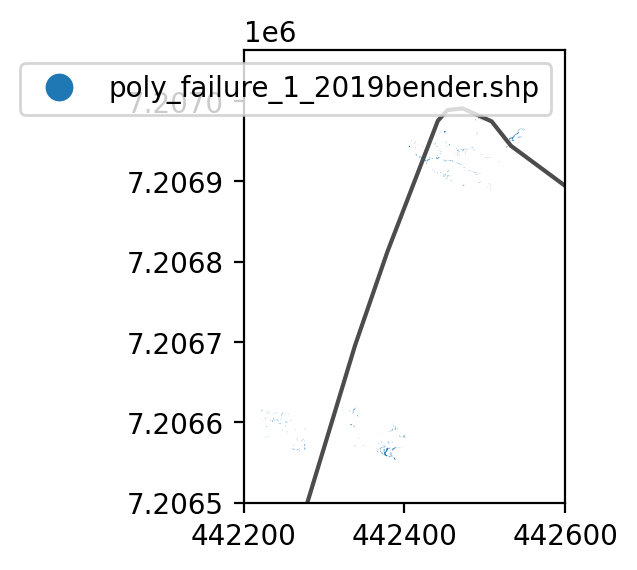

In [22]:
fig, ax = plt.subplots(figsize=(3,3), dpi=200)
for i in range(len(polys_2019_list)):
    shape = gpd.read_file(polys_2019_list[i])
    shape['filename'] = os.path.basename(polys_2019_list[i])
    shape = shape.to_crs('epsg:32603')
    im = shape.plot(ax=ax, zorder=1, column='filename', legend=True)
im2 = UAS.boundary.plot(ax=ax, color='k', alpha=0.7, zorder=0)
ax.set_ylim(7.2065e6)
ax.set_xlim(442200, 442600)

In [537]:
# pts = (int) number of bins for slope-area space
# res = (float, can be, i guess) raster resolution
def make_heatmap(polys, slope_raster, area_raster, pts, res):
    
    polys = gpd.read_file(polys)
    polys = polys.to_crs('epsg:32603')
    
    polys["area (m2)"] = polys['geometry'].area
    
    dinf_stats = zonal_stats(polys, area_raster, all_touched=True)
    slope_stats = zonal_stats(polys, slope_raster, all_touched=True)
    
    df_dinf = pd.DataFrame(dinf_stats).add_prefix('dInf_')
    df_slope = pd.DataFrame(slope_stats).add_prefix('slope_')

    df_stats = pd.merge(df_dinf, df_slope, how='outer', left_index=True, right_index=True)

    df_stats["area (m2)"] = test['geometry'].area
    
    drops = df_stats.dropna()
    
    # pts is number of spacings in the bins in slope-area space
    slope_array=np.linspace(7,25,num=pts)
    da_array=np.geomspace(1e1,1e4,num=pts)

    df_stats['bin_dinf'] = pd.cut(df_stats['dInf_max'],bins=da_array, labels=range(len(da_array)-1)
                                 )
    df_stats['bin_slope'] = pd.cut(df_stats['slope_max'],bins=slope_array, labels=range(len(slope_array)-1))
                                   
    heatmap_df = df_stats
                                  
    df_out = df_stats.groupby(['bin_slope','bin_dinf'])['area (m2)']

    heatmap_arr = df_out.sum().sort_index().values.reshape(len(slope_array)-1,len(da_array)-1)
    
    return heatmap_arr
    

In [538]:
pts=40
slope_array=np.linspace(7,25,num=pts)
da_array=np.geomspace(1e1,1e4,num=pts)
heatmap_2018 = make_heatmap(data_path+'Teller_47_Data_Shapefiles\\poly_failure_TL47_2018_jcr.shp', "new_slope.tif", data_path+'Teller_47_Data_Rasters\\t47_acc.tif', 40, 2)

In [539]:
heatmap_2019 = make_heatmap(data_path+'Teller_47_Data_Shapefiles\\polys_2019.shp', "new_slope.tif", data_path+'Teller_47_Data_Rasters\\t47_acc.tif', 40, 2)

In [540]:
heatmap_differece = heatmap_2019-heatmap_2018
heatmap_differece[heatmap_differece < 0] = np.nan

Text(0.5, 0, 'Drainage area (m^2)')

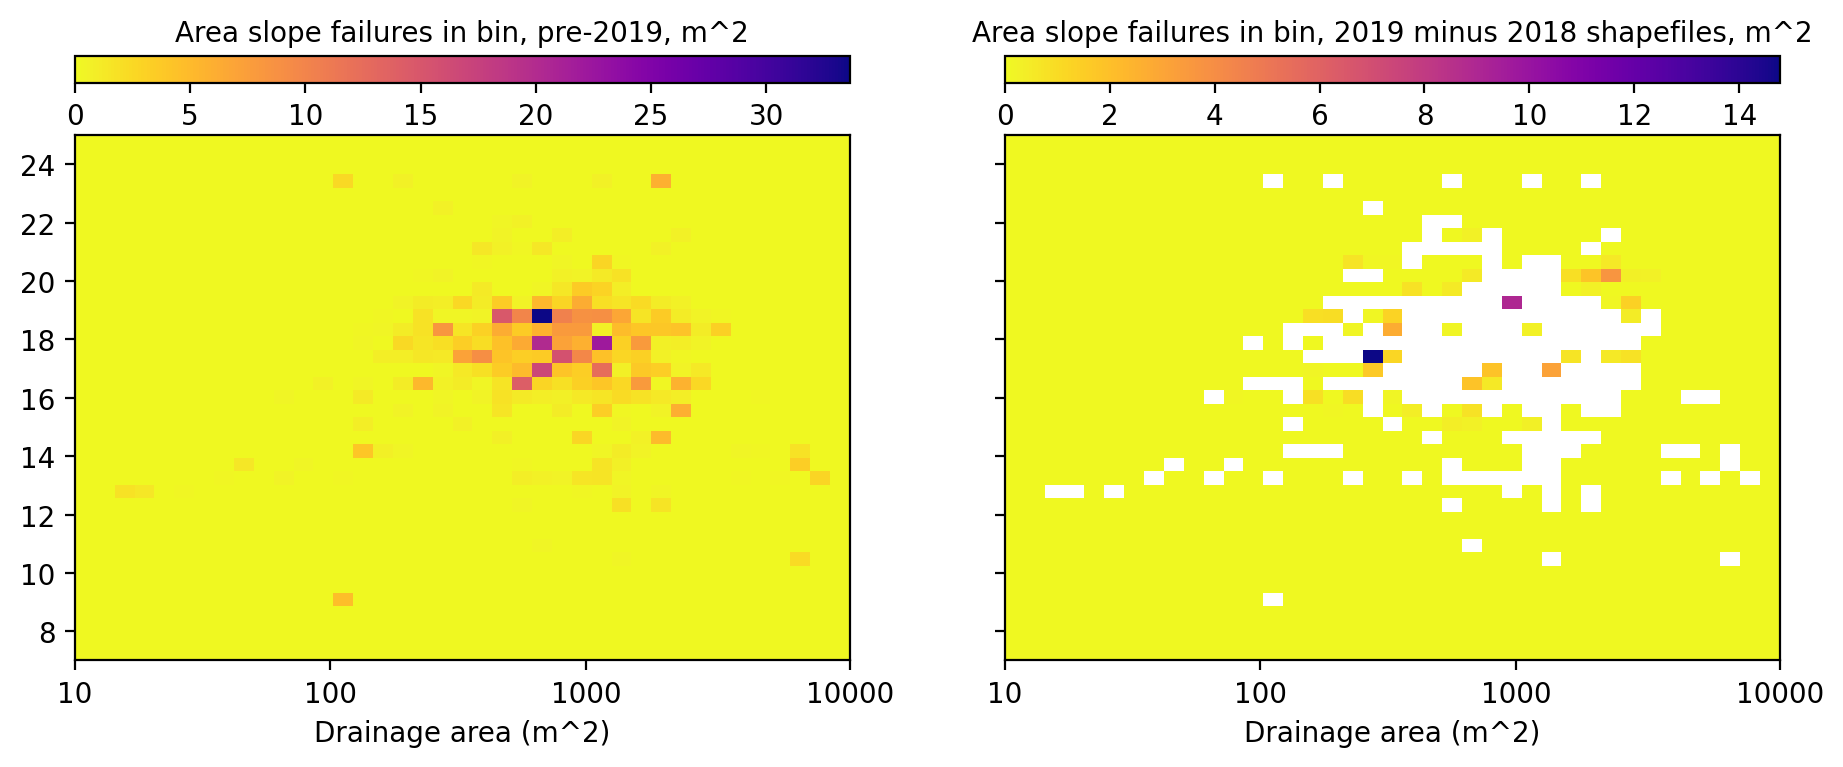

In [541]:
fig, ax = plt.subplots(1, 2, figsize=(11,4),dpi=200, sharey=True)

im0 = ax[0].imshow(heatmap_2018, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
               origin='lower')

ax[0].set_xticks([0, np.max(da_array)*.33, np.max(da_array)*.66, np.max(da_array)])
ax[0].set_xticklabels([int(da_array[0]), int(round(da_array[int(pts*.33)],0)), int(round(da_array[int(pts*.67)],0)), int(da_array[pts-1])])

divider = make_axes_locatable(ax[0])
# Add an axes to the right of the main axes.
cax1 = divider.append_axes("top", size="5%", pad="10%")
cb1 = fig.colorbar(im0, cax=cax1, orientation="horizontal")
cb1.set_label('Area slope failures in bin, pre-2019, m^2', labelpad=-40);
ax[0].set_xlabel('Drainage area (m^2)')



im1 = ax[1].imshow(heatmap_differece, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
               origin='lower')

ax[1].set_xticks([0, np.max(da_array)*.33, np.max(da_array)*.66, np.max(da_array)])
ax[1].set_xticklabels([int(da_array[0]), int(round(da_array[int(pts*.33)],0)), int(round(da_array[int(pts*.67)],0)), int(da_array[pts-1])])

divider = make_axes_locatable(ax[1])
# Add an axes to the right of the main axes.
cax1 = divider.append_axes("top", size="5%", pad="10%")
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal")
cb1.set_label('Area slope failures in bin, 2019 minus 2018 shapefiles, m^2', labelpad=-40);
ax[1].set_xlabel('Drainage area (m^2)')

In [542]:
#all_touched=True

dinf_stats = zonal_stats(polys_2018, data_path+'Teller_47_Data_Rasters\\t47_acc.tif', all_touched=True)

slope_stats = zonal_stats(polys_2018, "new_slope.tif", all_touched=True)
#slope_stats = zonal_stats(test, "new_slope.tif", all_touched=True)

In [543]:
df_dinf = pd.DataFrame(dinf_stats).add_prefix('dInf_')
df_slope = pd.DataFrame(slope_stats).add_prefix('slope_')

df_stats = pd.merge(df_dinf, df_slope, how='outer', left_index=True, right_index=True)

df_stats["area (m2)"] = test['geometry'].area
drops = df_stats.dropna()
df_stats

dInf_min  dInf_max    dInf_mean  dInf_count  slope_min  slope_max  \
0        287.0     290.0   288.666667           3  17.262379  17.262379   
1        286.0     344.0   312.250000           4  17.262379  17.262379   
2        299.0     322.0   310.500000           2  17.262379  17.262379   
3        314.0     398.0   367.666667           3  17.262379  17.262379   
4        339.0     430.0   384.500000           2  16.547785  16.547785   
...        ...       ...          ...         ...        ...        ...   
1190     293.0     519.0   406.000000           2  13.687014  13.687014   
1191     636.0     645.0   640.500000           2  18.176121  18.176121   
1192     965.0     995.0   980.000000           2  18.176121  18.176121   
1193    1090.0    1190.0  1140.000000           2  18.724949  19.438610   
1194     611.0    1138.0   872.750000           4  17.427858  18.581835   

      slope_mean  slope_count  area (m2)  
0      17.262379            1   0.707943  
1      17.262379            1   1.176804  
2      17.262379            1   0.330015  
3      17.262379            1   2.545543  
4      16.547785            1   0.442713  
...          ...          ...        ...  
1190   13.687014            1   0.131855  
1191   18.176121            1   0.874568  
1192   18.176121            1   0.280764  
1193   19.081779            2   0.146709  
1194   18.004847            2   1.892498  

[1195 rows x 9 columns]

In [561]:
polys_w_stats = pd.merge(polys_2018, df_stats)
polys_w_stats['centroid'] = polys_w_stats.centroid
points_w_stats = polys_w_stats.copy().set_geometry(polys_w_stats['centroid'])
points_w_stats['steepness'] = points_w_stats['slope_mean'] * (points_w_stats['dInf_mean'] ** (1/2))

In [544]:
pts=40
slope_array=np.linspace(7,25,num=pts)
da_array=np.geomspace(1e1,1e4,num=pts)

df_stats['bin_dinf'] = pd.cut(df_stats['dInf_max'],bins=da_array, labels=range(len(da_array)-1)
                             )
df_stats['bin_slope'] = pd.cut(df_stats['slope_max'],bins=slope_array, labels=range(len(slope_array)-1)
                              )
df_out = df_stats.groupby(['bin_slope','bin_dinf'])['area (m2)']

arr = df_out.sum().sort_index().values.reshape(len(slope_array)-1,len(da_array)-1)

In [545]:

df_points['bin_dinf'] = pd.cut(df_points['dinf'],bins=da_array, labels=range(len(da_array)-1)
                             )
df_points['bin_slope'] = pd.cut(df_points['slope'],bins=slope_array, labels=range(len(slope_array)-1)
                              )
df_out_points = df_points.groupby(['bin_slope','bin_dinf'])['slope']
counts = df_out_points.count().sort_index().values.reshape(len(slope_array)-1,len(da_array)-1)
total_area_in_bin = counts * 2 # counts is pixels, pixel is 2 m^2
prop_bin_failure_area = arr/total_area_in_bin
prop_bin_failure_area[prop_bin_failure_area > .25] = 0.25
#prop_bin_failure_area = np.nan_to_num(prop_bin_failure_area)

C:\Users\f005dv1\AppData\Local\Temp\ipykernel_2128\103714042.py:8: RuntimeWarning: invalid value encountered in true_divide
  prop_bin_failure_area = arr/total_area_in_bin


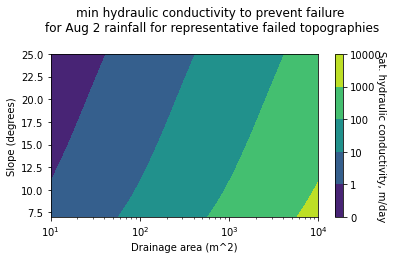

In [546]:
q_aug = .05; #[m/day] rain Aug 2 2020
z = 1; #active layer thickness, [m]
tanphi = .84; # original; tan (40 degrees) i think??? internal angle of friction
s_w_dens = 2; #ratio of density of saturated soil to water 
Ksat_maybe = 2.2; #m/day if 1/3 is organic and 2/3 is mineral 

slope_normal_array = np.cos(np.radians(slope_array))
k_aug_crit_matrix=np.zeros((pts,pts))

for i in range(len(da_array)):
    for j in range(len(slope_array)):
        k_aug_crit_matrix[i,j] = q_aug / ((np.sin(np.radians(slope_array[i])) *
                       (s_w_dens)) / da_array[j] )* (1 -  (np.tan(np.radians(slope_array[i])) / tanphi)) * z * slope_normal_array[i];

##Explore this param scape as function of soil thickness
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(6,3))
CS = ax.contourf(da_array,slope_array,k_aug_crit_matrix,locator=ticker.LogLocator())
#ax.clabel(CS, inline=1)
ax.set_xscale('log')
cbar = fig.colorbar(CS)
fig.suptitle('min hydraulic conductivity to prevent failure \nfor Aug 2 rainfall for representative failed topographies',y=1.1)
plt.ylabel('Slope (degrees)')
plt.xlabel('Drainage area (m^2)')
cbar.set_label('Sat. hydraulic conductivity, m/day', rotation=270)

### Make plot

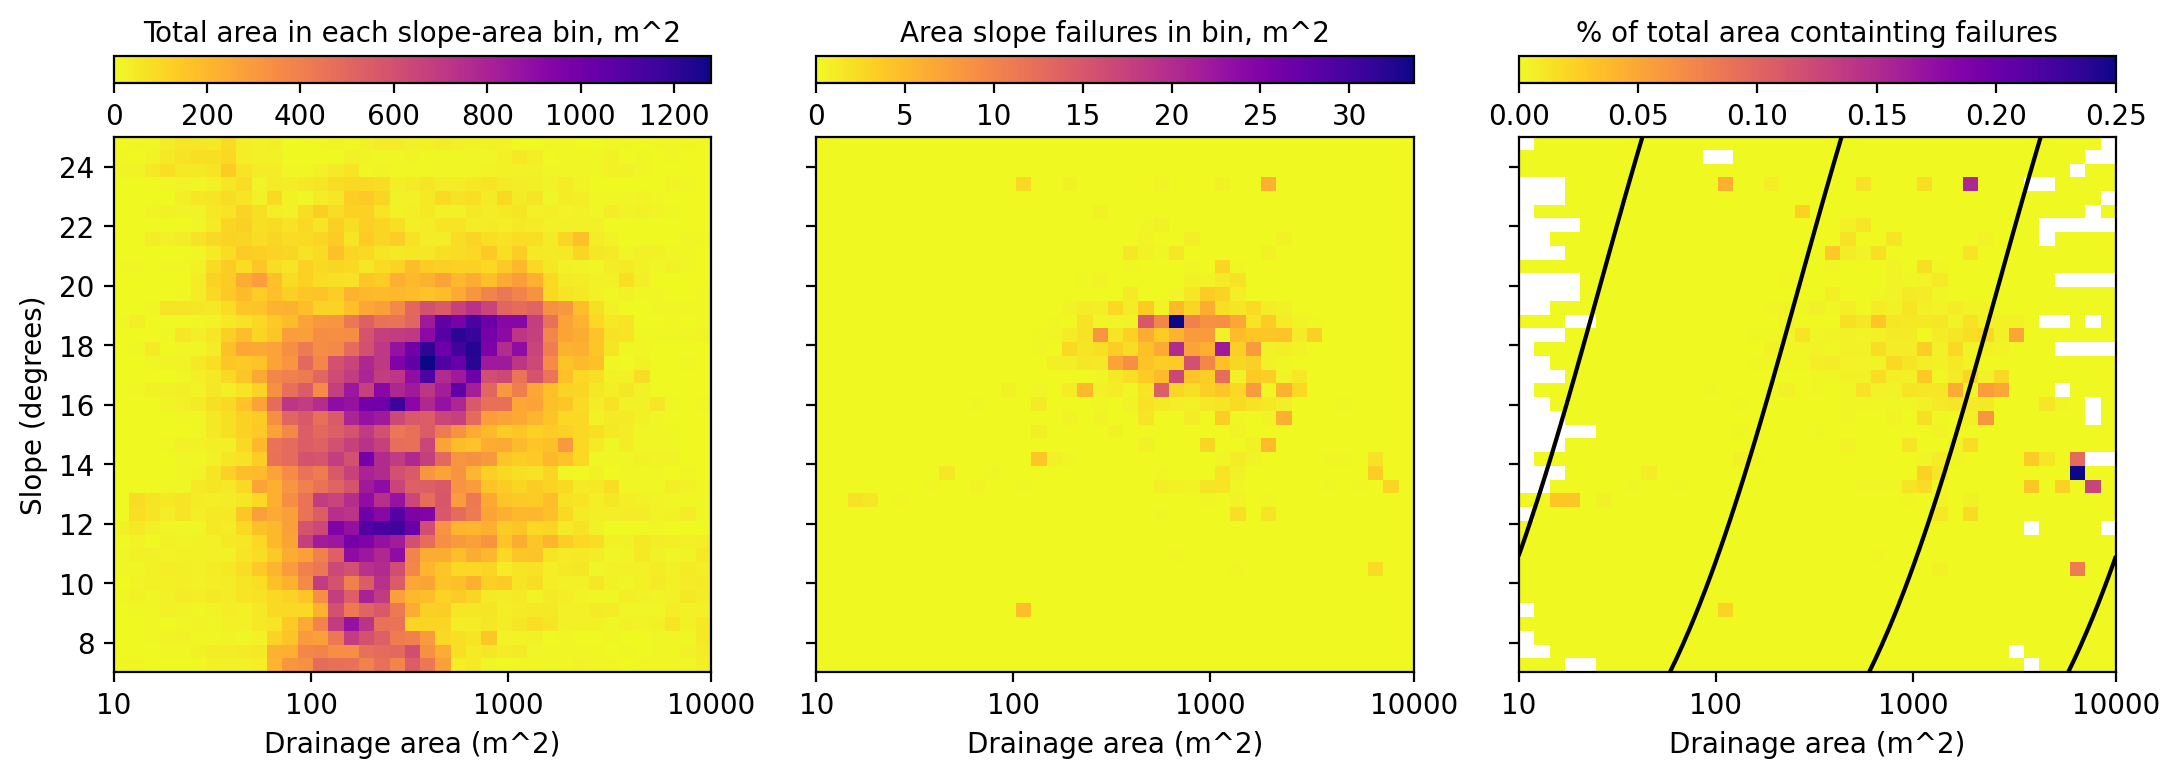

In [548]:
fig, ax = plt.subplots(1,3, figsize=(11,4),dpi=200, sharey=True)

im0 = ax[0].imshow(total_area_in_bin, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
               origin='lower')

# This is to fake log bins without making the axis truly log
ax[0].set_xticks([0, np.max(da_array)*.33, np.max(da_array)*.66, np.max(da_array)])
ax[0].set_xticklabels([int(da_array[0]), int(round(da_array[int(pts*.33)],0)), int(round(da_array[int(pts*.67)],0)), int(da_array[pts-1])])

divider = make_axes_locatable(ax[0])
# Add an axes to the right of the main axes.
cax0 = divider.append_axes("top", size="5%", pad="10%")
cb0 = fig.colorbar(im0, cax=cax0, orientation="horizontal")
cb0.set_label('Total area in each slope-area bin, m^2', labelpad=-40);
ax[0].set_ylabel('Slope (degrees)')
ax[0].set_xlabel('Drainage area (m^2)')

im1 = ax[1].imshow(arr, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
               origin='lower')

ax[1].set_xticks([0, np.max(da_array)*.33, np.max(da_array)*.66, np.max(da_array)])
ax[1].set_xticklabels([int(da_array[0]), int(round(da_array[int(pts*.33)],0)), int(round(da_array[int(pts*.67)],0)), int(da_array[pts-1])])

divider = make_axes_locatable(ax[1])
# Add an axes to the right of the main axes.
cax1 = divider.append_axes("top", size="5%", pad="10%")
cb1 = fig.colorbar(im1, cax=cax1, orientation="horizontal")
cb1.set_label('Area slope failures in bin, m^2', labelpad=-40);
ax[1].set_xlabel('Drainage area (m^2)')

im2 = ax[2].imshow(prop_bin_failure_area, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
               origin='lower')

ax[2].set_xticks([0, np.max(da_array)*.33, np.max(da_array)*.66, np.max(da_array)])
ax[2].set_xticklabels([int(da_array[0]), int(round(da_array[int(pts*.33)],0)), int(round(da_array[int(pts*.67)],0)), int(da_array[pts-1])])

divider = make_axes_locatable(ax[2])
# Add an axes to the right of the main axes.
cax2 = divider.append_axes("top", size="5%", pad="10%")
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
cb2.set_label('% of total area containting failures', labelpad=-40);
ax[2].set_xlabel('Drainage area (m^2)')

# Overlay contour where its x axis is actually logarithmic

twin = ax[2].twiny()
CS = twin.contour(da_array,slope_array,k_aug_crit_matrix, colors='k', locator=ticker.LogLocator())
fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#twin.clabel(CS, CS.levels, inline=True, colors= 'k', fmt=fmt, fontsize=10)
twin.set_xscale("log")
twin.axis("off")
divider = make_axes_locatable(twin)
# Add an axes to the right of the main axes.
cax_twin = divider.append_axes("top", size="5%", pad="10%")
cax_twin.axis("off")


fig.tight_layout()
plt.savefig("failures_in_slope_area_space.png")

### Old plots

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import colors

fig, ax = plt.subplots(figsize=(4,4),dpi=200)
#Y axis is rows in reshape (first value in reshape)


#CS = ax.contour(da_array,slope_array,k_aug_crit_matrix, #levels=[3e2,4e2,5e2],
#                 alpha=.9)
im = ax.imshow(prop_bin_failure_area, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
#                extent=[0, len(da_array)-1, 0, len(slope_array)-1],
               #                norm=colors.LogNorm(),
               origin='lower')
# clabel = ax.clabel(CS, CS.levels, inline=True, 
#                 #fmt='0:.0f',
#                   fontsize=6)

divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = divider.append_axes("right", size="5%", pad="2%")
cb = fig.colorbar(im, cax=cax)
cb.set_label('% of total area containting failures', rotation=270, labelpad=20);
#ax.set_xscale('log')

ax.set_xlim(600)
ax.set_ylabel('Slope (degrees)')
ax.set_xlabel('Drainage area (m^2)')

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import colors

fig, ax = plt.subplots(figsize=(4,4),dpi=200)
#Y axis is rows in reshape (first value in reshape)


#CS = ax.contour(da_array,slope_array,k_aug_crit_matrix, #levels=[3e2,4e2,5e2],
#                 alpha=.9)
im = ax.imshow(total_area_in_bin, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
#                extent=[0, len(da_array)-1, 0, len(slope_array)-1],
               #                norm=colors.LogNorm(),
               origin='lower')
# clabel = ax.clabel(CS, CS.levels, inline=True, 
#                 #fmt='0:.0f',
#                   fontsize=6)

divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = divider.append_axes("right", size="5%", pad="2%")
cb = fig.colorbar(im, cax=cax)
cb.set_label('Total area in each slope-area bin, m^2', rotation=270, labelpad=20);
#ax.set_xscale('log')
ax.set_xlim(600)
ax.set_ylabel('Slope (degrees)')
ax.set_xlabel('Drainage area (m^2)')

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import colors

fig, ax = plt.subplots(figsize=(4,4),dpi=200)

#Y axis is rows in reshape (first value in reshape)


#CS = ax.contour(da_array,slope_array,k_aug_crit_matrix, #levels=[3e2,4e2,5e2],
#                 alpha=.9)
im = ax.imshow(arr, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
#                extent=[0, len(da_array)-1, 0, len(slope_array)-1],
               #                norm=colors.LogNorm(),
               origin='lower')
# clabel = ax.clabel(CS, CS.levels, inline=True, 
#                 #fmt='0:.0f',
#                   fontsize=6)

divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = divider.append_axes("right", size="5%", pad="2%")
cb = fig.colorbar(im, cax=cax)
cb.set_label('Mapped slope failures, m^2', rotation=270, labelpad=20);
#ax.set_xscale('log')
ax.set_xlim(600)
ax.set_ylabel('Slope (degrees)')
ax.set_xlabel('Drainage area (m^2)')

### Experimenting with steepness

In [549]:
xx, yy = np.meshgrid(slope_array[:-1], da_array[:-1])
zz = xx * np.sqrt(yy) #Theodoratos and Kirchner, 2020 and Litwin et al 2021
# xx, yy = np.meshgrid(x, y)
# zz = np.sqrt(xx**2 + yy**2)

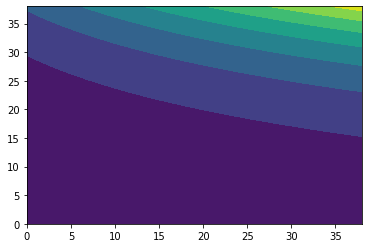

In [550]:
plt.contourf(zz)


In [555]:
prop_bin_failure_area[prop_bin_failure_area == 0.0] = np.nan

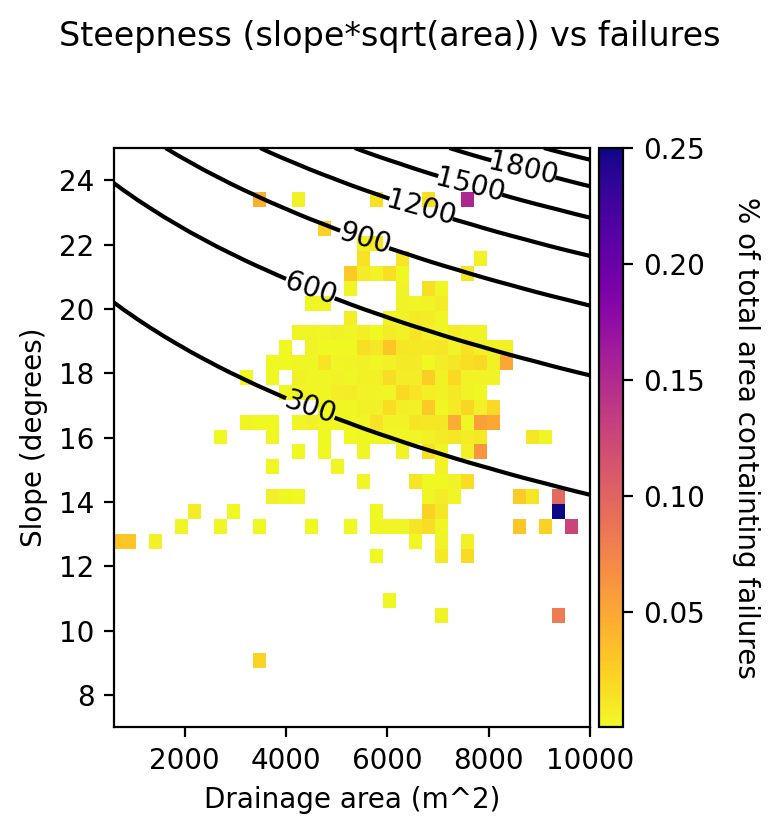

In [556]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import colors

fig, ax = plt.subplots(figsize=(4,4),dpi=200)
#Y axis is rows in reshape (first value in reshape)


#CS = ax.contour(da_array,slope_array,k_aug_crit_matrix, #levels=[3e2,4e2,5e2],
#                 alpha=.9)
im = ax.imshow(prop_bin_failure_area, cmap='plasma_r', interpolation='none', aspect='auto',
               extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],
#                extent=[0, len(da_array)-1, 0, len(slope_array)-1],
               #                norm=colors.LogNorm(),
               origin='lower')
# clabel = ax.clabel(CS, CS.levels, inline=True, 
#                 #fmt='0:.0f',
#                   fontsize=6)

divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = divider.append_axes("right", size="5%", pad="2%")
cb = fig.colorbar(im, cax=cax)
cb.set_label('% of total area containting failures', rotation=270, labelpad=20);
#ax.set_xscale('log')

CS = ax.contour(zz,extent=[np.min(da_array), np.max(da_array), np.min(slope_array), np.max(slope_array)],colors='k')
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10, colors='k')

ax.set_xlim(600)
ax.set_ylabel('Slope (degrees)')
ax.set_xlabel('Drainage area (m^2)')

fig.suptitle("Steepness (slope*sqrt(area)) vs failures", y=1.03)

fig.tight_layout()
#fig.savefig('steepness.png',dpi=300, bbox_inches = "tight")

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([-16.118095 , -11.445079 ,  -6.7720633,  -2.099047 ,   2.5739694,
          7.2469854,  11.920002 ,  16.593018 ,  21.266033 ,  25.93905  ,
         30.612066 ], dtype=float32),
 <a list of 1818 BarContainer objects>)

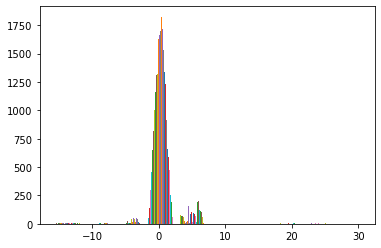

In [640]:
plt.hist(np.log(q_cr_T_plot))

In [643]:
qt_digi = np.digitize((np.log(q_cr_T_plot)), np.array(np.arange(-5.0,5.0,0.5)), right=True)

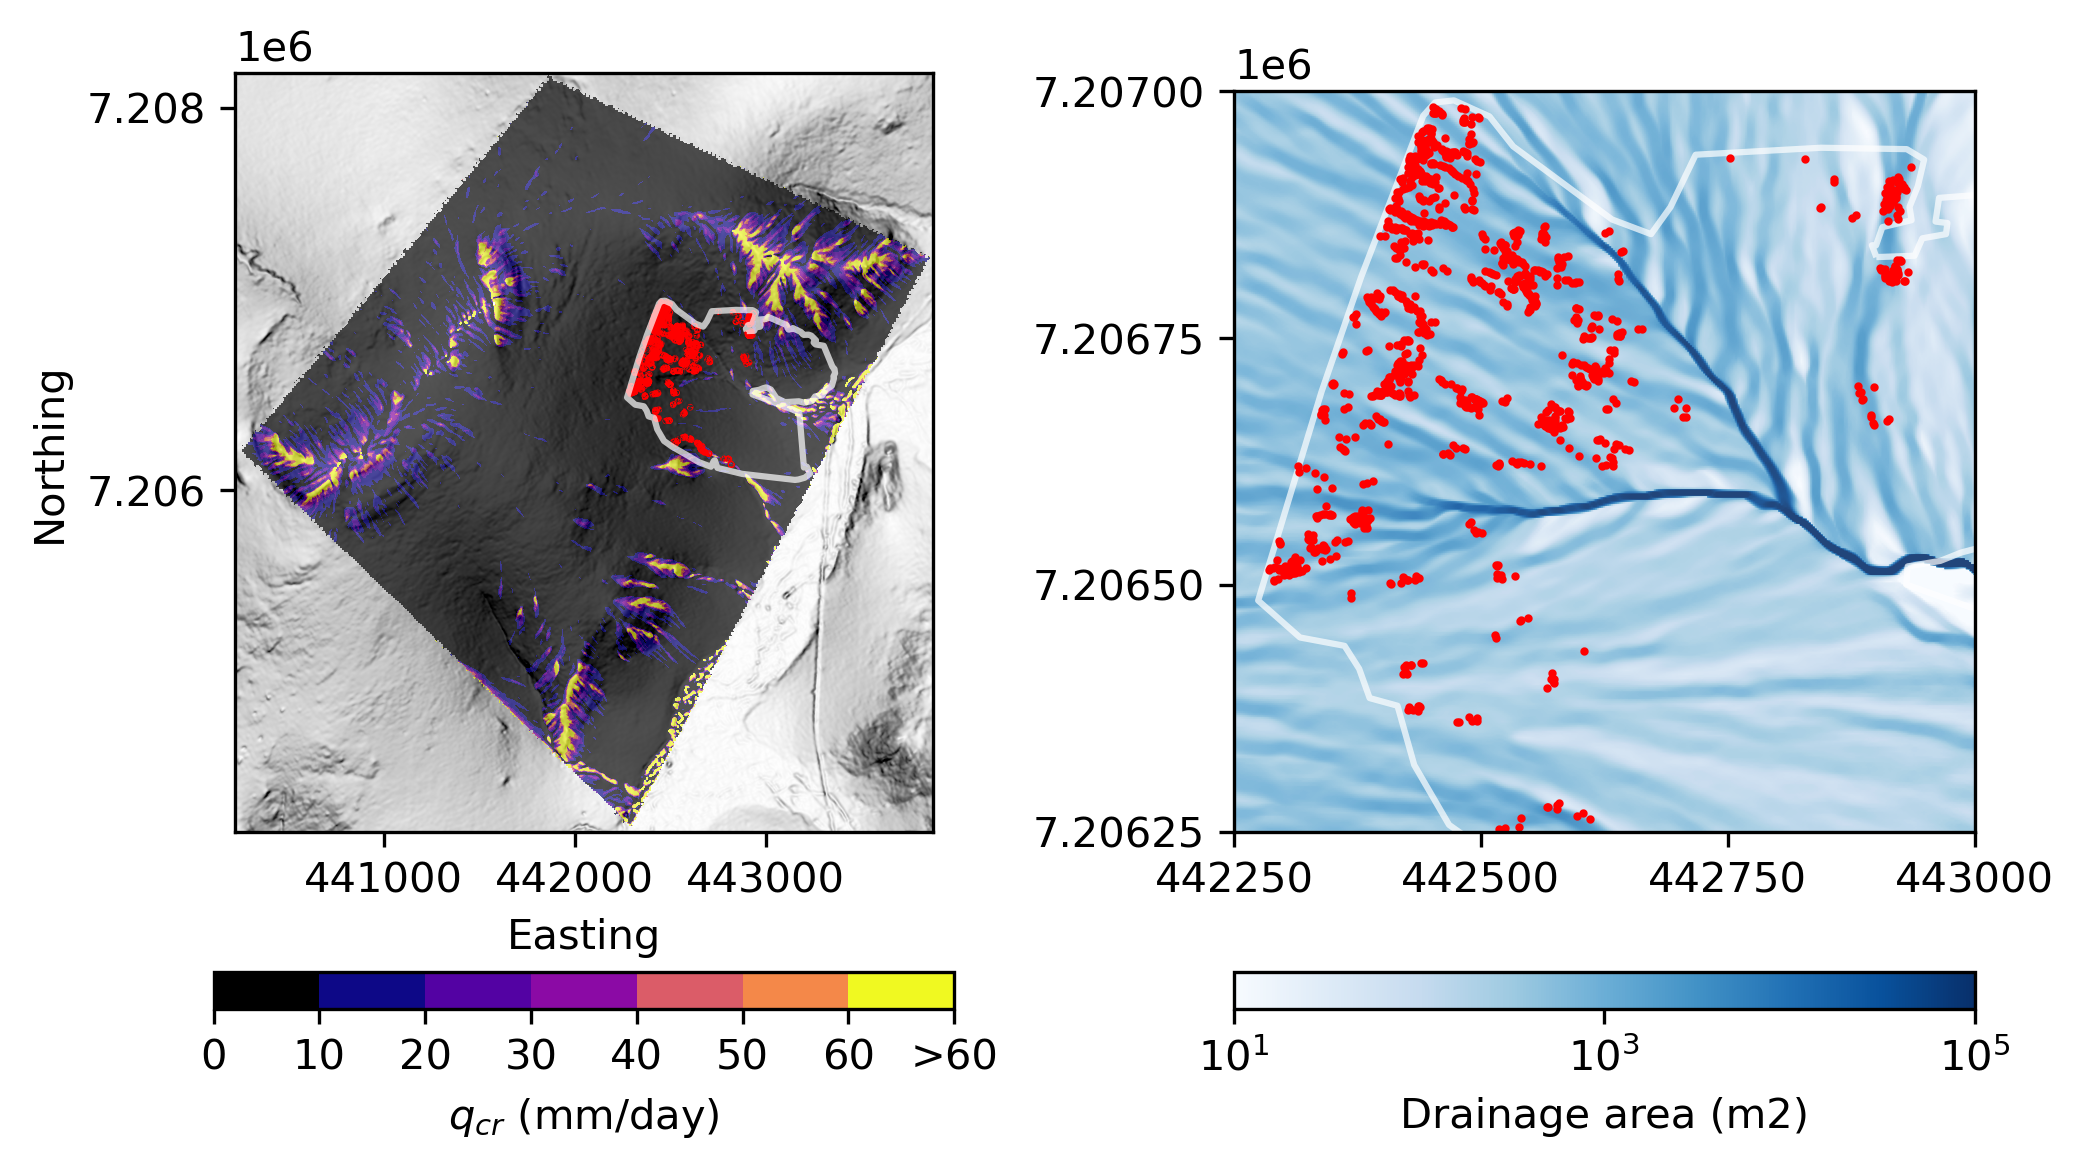

In [650]:
extent_slope=[slope.bounds[0], slope.bounds[2], slope.bounds[1], slope.bounds[3]]
poly_extent = np.asarray(UAS.geometry.total_bounds)[[0,2,1,3]]
test_bounds = np.asarray(slope.bounds)[[0,2,1,3]]*3

import numpy.ma as ma
fig, ax = plt.subplots(1,2, figsize=(7,4),dpi=300)
im0 = rasterio.plot.show(t47_slope, extent=extent_slope,
                         vmin=0.0,
                         vmax=30.0,
                         cmap="Greys",
                         #alpha=0.5,
                         zorder=0,
                         ax=ax[0])

with rasterio.open("q_cr.tif", masked=True) as q_cr:      
    qcr_colors = ax[0].imshow(q_cr.read(1), cmap=cmap, norm=norm,
                           #vmin=10, vmax=60
                          )
    im1 = rasterio.plot.show(q_cr,cmap=cmap, norm=norm, 
                             #vmin=10, vmax=60,
                             extent=extent_slope,
                             ax=ax[0], alpha=0.67,
                             zorder=1)
b1 = test.boundary.plot(ax=ax[0], color='r', zorder=2)
b2 = UAS.boundary.plot(ax=ax[0],  color='white', alpha=0.7, zorder=2)

cbar = fig.colorbar(qcr_colors, ax=ax[0], orientation='horizontal',
                    label='$q_{cr}$ (mm/day)',
                    fraction=0.04,
                    #pad=0.1
                   )
mod_ticks = cbar.ax.get_xticks().astype(int).astype(str)
mod_ticks[-1:] = '>60'
cbar.ax.set_xticklabels(mod_ticks)

ax[0].set_ylim(extent_slope[2]-10,extent_slope[3]+10)
ax[0].set_xlim(extent_slope[0]-10,extent_slope[1]+10)

with rasterio.open("q_cr.tif", masked=True) as q_cr:      
    qt_digi_colors = ax[1].imshow(a, cmap='Blues',
                                 norm=LogNorm(
                                 vmin=1e1,
                                     vmax=1e5
                                 ), 
                          )
    im2 = rasterio.plot.show(a, transform=q_cr.transform,
                             cmap='Blues',
                             norm=LogNorm(
                             vmin=1e1,
                             vmax=1e5
                             ), 
                             extent=extent_slope,
                             ax=ax[1], alpha=0.9,
                             zorder=0)

b2 = UAS.boundary.plot(ax=ax[1],  color='white', alpha=0.7, zorder=1)
b1 = points_w_stats.plot(ax=ax[1],
#                          column='steepness',
#                          cmap='hot',
                         color='r',
                         markersize=1,
#                          edgecolor='k',
#                          linewidth=0.5,
                         zorder=2)

cbar = fig.colorbar(qt_digi_colors, ax=ax[1], orientation='horizontal',
                    label='Drainage area (m2)',
                    fraction=0.04,
                    #pad=0.1
                   )
# mod_ticks = cbar.ax.get_xticks().astype(int).astype(str)
# mod_ticks[-1:] = '>60'
# cbar.ax.set_xticklabels(mod_ticks)

ax[1].set_ylim(7.20625e6,7.2070e6)
ax[1].set_xlim(442250,443000)

ax[0].locator_params(axis='x', nbins=3)
ax[0].locator_params(axis='y', nbins=3)
ax[0].set_xlabel("Easting")
ax[0].set_ylabel("Northing")

ax[1].locator_params(axis='x', nbins=3)
ax[1].locator_params(axis='y', nbins=3)


fig.tight_layout()

# Code to only run once

## Get InSAR displacements and locations as GeoDatabase

In [73]:
keys = []
data = []
with open(os.path.join(data_path, "insar_2022//subseasonal_all.txt")) as read:
    for line in read:
        start = None; end = None
        for i,v in enumerate(line):
            if v == "[": start = i
            if v == "]": end = i
            if start is not None and end is not None:
                data.append(line[start+1:end])
                start = None; end = None
                
with open(os.path.join(data_path, "insar_2022//subseasonal_all.txt")) as read:
    for line in read:
        start = None; end = None
        for i,v in enumerate(line):
            start = 0
            if v == "[": end = i
            if start is not None and end is not None:
                keys.append(line[start:end-1])
                start = None; end = None



['point J4', 'point J3', 'point J2', 'point J1', 'point J5', '2017 doy', '2018 doy', '2019 doy', '2017 J1', '2017 J2', '2017 J3', '2017 J4', '2017 J5', '2018 J1', '2018 J2', '2018 J3', '2018 J4', '2018 J5', '2019 J1', '2019 J2', '2019 J3', '2019 J4', '2019 J5']


In [161]:
insar_dict = dict(zip(keys, data))
insar_dict

{'point J4': '(64.99157, -166.21616)',
 'point J3': '(64.96213, -166.22096)',
 'point J2': '(64.98904, -166.21966)',
 'point J1': '(64.97308, -166.27434)',
 'point J5': '(64.97644, -166.30580)',
 '2017 doy': '154, 166, 178, 190, 202, 214, 226, 238, 250, 262',
 '2018 doy': '161, 173, 197, 209, 221, 233, 245, 257, 269',
 '2019 doy': '156, 168, 180, 192, 204, 216, 228, 240, 252',
 '2017 J1': '0.         0.00997106 0.01780032 0.03218459 0.05117263 0.05350839 0.05604301 0.06525291 0.06812904 0.08536079',
 '2017 J2': '0.         0.0023323  0.0087052  0.01811787 0.02588284 0.02889847 0.0256803  0.02978935 0.0356676  0.03326893',
 '2017 J3': '0.         0.0025178  0.00464058 0.01470009 0.02584533 0.01976421 0.01696369 0.01920805 0.01815342 0.02332907',
 '2017 J4': '0.         -0.00304763  0.00036764  0.00754824  0.01662569  0.02546448 0.02391734  0.02450196  0.03277475  0.0307782 ',
 '2017 J5': '0.         0.00606616 0.0085659  0.01809947 0.03566433 0.03665202 0.04974686 0.05736145 0.06362108 

### Make the shapefile

In [162]:
pts_only = {key: insar_dict[key] for key in insar_dict.keys()
                               & {'point J4', 'point J3', 'point J1', 'point J2', 'point J5'}}
insar_locs = pd.DataFrame.from_dict(pts_only, orient="index", columns=['position'])
insar_locs['position'] = insar_locs['position'].map(lambda x: eval(x))

In [163]:
insar_pts_geom = gpd.points_from_xy([i[1] for i in insar_locs['position']], [i[0] for i in insar_locs['position']], crs="EPSG:4326")
insar_pts = gpd.GeoDataFrame(insar_locs, crs="EPSG:4326", geometry=insar_pts_geom)
insar_pts.drop(labels=['position'], axis=1).to_file("insar_pts.shp")

C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Make the dataframe

In [195]:
dict_2017 = {}
dict_2017['year'] = 2017
dict_2017['doy'] = [int(i) for i in insar_dict['2017 doy'].split(",")]
dict_2017['J1'] = [float(i) for i in insar_dict['2017 J1'].split()]
dict_2017['J2'] = [float(i) for i in insar_dict['2017 J2'].split()]
dict_2017['J3'] = [float(i) for i in insar_dict['2017 J3'].split()]
dict_2017['J4'] = [float(i) for i in insar_dict['2017 J4'].split()]
dict_2017['J5'] = [float(i) for i in insar_dict['2017 J5'].split()]

df_2017 = pd.DataFrame.from_dict(dict_2017)

In [196]:
dict_2018 = {}
dict_2018['year'] = 2018
dict_2018['doy'] = [int(i) for i in insar_dict['2018 doy'].split(",")]
dict_2018['J1'] = [float(i) for i in insar_dict['2018 J1'].split()]
dict_2018['J2'] = [float(i) for i in insar_dict['2018 J2'].split()]
dict_2018['J3'] = [float(i) for i in insar_dict['2018 J3'].split()]
dict_2018['J4'] = [float(i) for i in insar_dict['2018 J4'].split()]
dict_2018['J5'] = [float(i) for i in insar_dict['2018 J5'].split()]

df_2018 = pd.DataFrame.from_dict(dict_2018)

In [197]:
dict_2019 = {}
dict_2019['year'] = 2019
dict_2019['doy'] = [int(i) for i in insar_dict['2019 doy'].split(",")]
dict_2019['J1'] = [float(i) for i in insar_dict['2019 J1'].split()]
dict_2019['J2'] = [float(i) for i in insar_dict['2019 J2'].split()]
dict_2019['J3'] = [float(i) for i in insar_dict['2019 J3'].split()]
dict_2019['J4'] = [float(i) for i in insar_dict['2019 J4'].split()]
dict_2019['J5'] = [float(i) for i in insar_dict['2019 J5'].split()]

df_2019 = pd.DataFrame.from_dict(dict_2019)

In [198]:
insar_df = pd.concat([df_2017, df_2018, df_2019]).reset_index(drop=True)
#.melt(id_vars=['year','doy'], var_name='site', value_name='displacement')
# Decided melting was cool but would make plotting harder. 

In [200]:
insar_df.to_csv("insar_site_displacements.csv")

## Clean post-processed dGPS data

In [3]:
all_site_names = pd.read_csv(data_path+"Teller_47_Data_dGPS\\lobe_targets_all_observations.csv",na_values='-9999')
# "	Name_common"
gps_2018 = pd.read_csv(data_path+"Teller_47_Data_dGPS\\TL47_2018_data_common_names.csv",na_values='-9999')
# "Name_common"
gps_2019 = pd.read_csv(data_path+"Teller_47_Data_dGPS\\TL47_2019_20200601 - TL47_2019_20200601.csv",na_values='-9999').add_suffix('_2019')
# "Name"
gps_2019.head()

Name_2019 Layer_2019  rebar_height_m_2019  Easting_2019  Northing_2019  \
0  2019_avg_OPUS     Points                0.000   443006.2734    7206613.453   
1         bm1_ll     Points                0.000   443096.4168    7206476.362   
2         bm1_lr     Points                0.000   443096.9996    7206476.480   
3         bm1_cl     Points                0.295   443096.5050    7206476.584   
4         bm1_cr     Points                0.325   443096.8472    7206476.684   

   Elevation_2019  Elevation_minus_rebar_m_2019  GlobalLati_2019  \
0      106.273440                    106.273440         1.134090   
1       81.566954                     81.566954         1.134069   
2       81.551658                     81.551658         1.134069   
3       81.971412                     81.676412         1.134069   
4       81.990058                     81.665058         1.134069   

   GlobalLong_2019  GlobalElli_2019  ElliHeight_minus_rebar_m_2019  \
0        -2.900872       111.240164                     111.240164   
1        -2.900837        86.535640                      86.535640   
2        -2.900837        86.520345                      86.520345   
3        -2.900837        86.940096                      86.645096   
4        -2.900837        86.958743                      86.633743   

   LocalLatit_2019  LocalLongi_2019  LocalEllip_2019  \
0        64.978596      -166.207695       111.240250   
1        64.977381      -166.205730        86.535726   
2        64.977383      -166.205718        86.520431   
3        64.977383      -166.205728        86.940182   
4        64.977384      -166.205721        86.958829   

   ElliHeight_minus_Rebar_m_2019  H_Prec_Obs_2019  V_Prec_Obs_2019  \
0                     111.240250         0.000000         0.000000   
1                      86.535726         0.008705         0.009304   
2                      86.520431         0.008349         0.008842   
3                      86.645182         0.008279         0.008427   
4                      86.633829         0.008526         0.008842   

  Date_Obs_2019 Time_Obs_2019  
0           NaN           NaN  
1     8/15/2019    2:31:14 PM  
2     8/15/2019    2:32:04 PM  
3     8/15/2019    2:35:27 PM  
4     8/15/2019    2:34:21 PM

In [4]:
merge_2018 = pd.merge(all_site_names, gps_2018, left_on="Name_common", right_on="Name_common", how="inner")
merge_all = pd.merge(merge_2018, gps_2019, left_on="Name_common", right_on="Name_2019", how="inner")
merge_all.head()

Name_common target_name  Easting_2019_x  Northing_2019_x  Elevation_2019_x  \
0   fglb3l_lr   Target 3L     442854.7163      7206981.709        211.891757   
1   fglb3l_ur   Target 3L     442855.0950      7206981.911        211.886443   
2   fglb3l_ul   Target 3L     442855.0502      7206982.180        211.779055   
3   fglb3l_ll   Target 3L     442854.5269      7206981.829        211.772631   
4   fglb4l_ur   Target 4L     442845.4031      7207013.717        219.949445   

   Easting_2018_x  Northing_2018_x  Elevation_2018_x  Easting_2017  \
0     442855.2947      7206981.799        211.786439   442855.0194   
1     442855.0222      7206982.211        211.791926   442855.2641   
2     442854.4976      7206981.851        211.785409   442854.7858   
3     442854.7870      7206981.463        211.724989   442854.4886   
4     442845.4155      7207013.731        219.962401   442845.4115   

   Northing_2017  ...  GlobalElli_2019  ElliHeight_minus_rebar_m_2019  \
0    7206982.248  ...       216.687339                     216.687339   
1    7206981.824  ...       216.726567                     216.726567   
2    7206981.501  ...       216.741555                     216.741555   
3    7206981.877  ...       216.735134                     216.735134   
4    7207013.856  ...       224.911554                     224.911554   

   LocalLatit_2019_y  LocalLongi_2019_y  LocalEllip_2019_y  \
0          64.981871        -166.211054         216.687425   
1          64.981874        -166.211043         216.726653   
2          64.981878        -166.211048         216.741641   
3          64.981874        -166.211059         216.735220   
4          64.982159        -166.211266         224.911640   

   ElliHeight_minus_Rebar_m_2019  H_Prec_Obs_2019_y  V_Prec_Obs_2019_y  \
0                     216.687425           0.006186           0.007483   
1                     216.726653           0.006050           0.007306   
2                     216.741641           0.005936           0.007201   
3                     216.735220           0.005887           0.007138   
4                     224.911640           0.006094           0.007553   

   Date_Obs_2019_y Time_Obs_2019_y  
0        8/10/2019      6:49:07 PM  
1        8/10/2019      6:50:19 PM  
2        8/10/2019      6:51:14 PM  
3        8/10/2019      6:52:09 PM  
4        8/10/2019      7:10:42 PM  

[5 rows x 60 columns]

In [5]:
save_2017 = merge_all.loc[:, [x for x in merge_all.columns if x.endswith(('_2017', 'common'))]]

cleaned_final = pd.merge(merge_all.dropna(axis=1), save_2017)
cleaned_final.to_csv("target_locs_all_measurements.csv")

In [11]:
# Make a dataframe where the corners and middles of lobe targets are grouped and averaged rendering a single location per target per year
average_cleaned_final = cleaned_final.groupby('target_name').mean().reset_index()
average_cleaned_final.loc[average_cleaned_final['target_name'].str.contains("Target"),'type'] = 'lobe'
average_cleaned_final.loc[average_cleaned_final['target_name'].str.contains("t2"),'type'] = 'gcp'
average_cleaned_final.head()


target_name  Easting_2018_y  Northing_2018_y  Elevation_2018_y  \
0   Target 1B   443052.250900     7.206594e+06         99.986366   
1   Target 1F   443060.962800     7.206547e+06         91.659086   
2   Target 1M   443057.235150     7.206555e+06         93.255323   
3   Target 1S   443057.726375     7.206575e+06         96.744242   
4   Target 2B   443003.830000     7.206679e+06        121.632294   

   H_Prec_Obs_2018_y  V_Prec_Obs_2018_y  rebar_height_m_2019  Easting_2019_y  \
0           0.012774           0.015074                  0.0    443052.25015   
1           0.013685           0.016168                  0.0    443060.97080   
2           0.014075           0.016635                  0.0    443057.29600   
3           0.013130           0.015459                  0.0    443057.71285   
4           0.013061           0.015362                  0.0    443003.84415   

   Northing_2019_y  Elevation_2019_y  ...  V_Prec_Obs_2019_y   Easting_2017  \
0     7.206594e+06         99.848133  ...           0.009779  443052.240250   
1     7.206547e+06         91.425956  ...           0.005862  443060.928425   
2     7.206555e+06         93.035111  ...           0.005615  443057.188700   
3     7.206574e+06         96.628743  ...           0.007540  443057.686525   
4     7.206679e+06        121.646924  ...           0.006537  443003.851850   

   Northing_2017  Elevation_2017  LocalLatit_2017  LocalLongi_2017  \
0   7.206594e+06      100.044618        64.978431      -166.206713   
1   7.206547e+06       91.768130        64.978011      -166.206510   
2   7.206555e+06       93.278272        64.978084      -166.206593   
3   7.206575e+06       96.797417        64.978256      -166.206590   
4   7.206680e+06      121.691813        64.979188      -166.207773   

   LocalEllip_2017  H_Prec_Obs_2017  V_Prec_Obs_2017  type  
0       105.011799         0.012146         0.014553  lobe  
1        96.735910         0.011675         0.013917  lobe  
2        98.245939         0.011702         0.013944  lobe  
3       101.764855         0.011843         0.014139  lobe  
4       126.657827         0.015727         0.020657  lobe  

[5 rows x 30 columns]

In [22]:
average_cleaned_final.to_csv("target_locs_cleaned.csv")

## Create topo and slope maps from ArcticDEM

We are going to build a new slope map from the source DEM since we want to eliminate microtopography from our slope maps. So we coarsen the DEM to 10 meters from 2, then calculate slope on that raster, then upscale that raster back to 2 m so we can compare it with the 2 m drainage area array

In [ ]:
import richdem as rd

In [ ]:
from contextlib import contextmanager  

import rasterio
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling

# use context manager so DatasetReader and MemoryFile get cleaned up automatically
@contextmanager
def resample_raster(raster, target_res):
    # Forces into original target shape, will rewrite it for a better function later
    target_shape=(1979, 1818)
    
    t = raster.transform

    # rescale the metadata
    scale = t[0]/target_res
    transform = Affine(t.a / scale, t.b, t.c, t.d, t.e / scale, t.f)
    
    if raster.shape == target_shape:
        height = int(raster.height * scale)
        width = int(raster.width * scale)
    else: 
        height = target_shape[0]
        width = target_shape[1]
            

    profile = raster.profile
    profile.update(transform=transform, driver='GTiff', height=height, width=width)

    data = raster.read( # Note changed order of indexes, arrays are band, row, col order not row, col, band
            out_shape=(raster.count, height, width),
            resampling=Resampling.cubic,
        )

    with MemoryFile() as memfile:
        with memfile.open(**profile) as dataset: # Open as DatasetWriter
            dataset.write(data)                     
            del data

        with memfile.open() as dataset:  # Reopen as DatasetReader
            yield dataset  # Note yield not return     


with rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_dem.tif') as src:
    with resample_raster(src, target_res=10) as resampled:
        print('Orig dims: {}, New dims: {}'.format(src.shape, resampled.shape))
        print(repr(resampled))
        out_meta = resampled.meta.copy()
        with rasterio.open("new_dem.tif","w",**out_meta) as dest:
            dest.write(resampled.read(1),1)
        
        elev_10m = rd.LoadGDAL("new_dem.tif")
        new_slope = rd.TerrainAttribute(elev_10m, attrib='slope_degrees')

        with rasterio.open("new_slope.tif","w",**out_meta) as dest:
            print('Slope dims: {}'.format(dest.shape))
            dest.write(new_slope, 1) #https://gis.stackexchange.com/questions/279953/numpy-array-to-gtiff-using-rasterio-without-source-raster
        #plt.imshow(new_slope)
        
        with rasterio.open("new_slope.tif") as src:
            with resample_raster(src, target_res=2) as resampled:
                print('Orig dims: {}, New dims: {}'.format(src.shape, resampled.shape))
                print(repr(resampled))
                out_meta = resampled.meta.copy()
                with rasterio.open("new_slope_2m.tif","w",**out_meta) as dest:
                    dest.write(resampled.read(1),1)

        
        
        
#https://gis.stackexchange.com/questions/329434/creating-an-in-memory-rasterio-dataset-from-numpy-array/329439#329439
#with edits by me to turn height and width to integer if you want to downscale
#and automated scaling after providing desired output resolution (a little more intuitive)

In [ ]:
with rasterio.open(data_path+'Teller_47_Data_Rasters\\t47_dem.tif') as src:
    print(src.shape)
    print(src.transform)
    print(src.bounds)
    src.close()
with rasterio.open('new_slope_2m.tif') as src:
    print(src.shape)
    print(src.transform)
    print(src.bounds)
    src.close()

I think I've done it

## Export 2019 failures

In [61]:
f_2019 = pd.read_csv(data_path+'Teller_47_Data_Shapefiles\\HillslopeFailures2019Only.csv')

In [62]:
f_2019['geometry'] = gpd.GeoSeries.from_wkt(f_2019['geometry'])
f_2019_gpd = gpd.GeoDataFrame(f_2019, geometry='geometry', crs='epsg:32603')

# f_2019_gpd.set_geometry('geometry',
#                         # drop=True,
#                         # inplace=True,
#                         # crs="EPSG:4326"
#                        )

<AxesSubplot:>

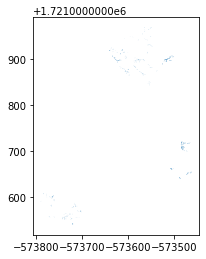

In [63]:
f_2019_gpd.to_crs('epsg:32603').plot()

In [64]:
f_2019_gpd.to_crs('epsg:32603').to_file(data_path+'Teller_47_Data_Shapefiles\\HillslopeFailures2019Only.shp')

C:\Users\f005dv1\Anaconda3\envs\t47\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\f005dv1\AppData\Local\Temp\ipykernel_5984\1776463080.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  f_2019_gpd.to_crs('epsg:32603').to_file(data_path+'Teller_47_Data_Shapefiles\\HillslopeFailures2019Only.shp')


In [65]:
f_2019_gpd

id  obb_width  minor_angle  \
0    poly_failure_1_2019_v1_jcr_widths.gpkg   0.763362    95.548847   
1    poly_failure_1_2019_v1_jcr_widths.gpkg   0.476211   105.289549   
2    poly_failure_1_2019_v1_jcr_widths.gpkg   0.513011   112.586788   
3    poly_failure_1_2019_v1_jcr_widths.gpkg   1.017808   126.738013   
4    poly_failure_1_2019_v1_jcr_widths.gpkg   0.290666   170.580398   
..                                      ...        ...          ...   
200   poly_failure_42019_v1_jcr_widths.gpkg   0.444857   161.875003   
201   poly_failure_42019_v1_jcr_widths.gpkg   0.644680     3.390475   
202   poly_failure_42019_v1_jcr_widths.gpkg   0.473334   153.396519   
203   poly_failure_42019_v1_jcr_widths.gpkg   0.740344    59.352192   
204   poly_failure_42019_v1_jcr_widths.gpkg   0.484289    54.424724   

     obb_length  major_angle     width  width_std  profile_curvature  \
0      1.510368     5.548847  0.364059   0.133229          -1.928250   
1      0.953177    15.289549  0.260921   0.127070          -1.124550   
2      0.725780    22.586788  0.374235   0.113452          -1.928250   
3      2.954936    36.738013  0.156545   0.192179          -1.928250   
4      1.515507    80.580398  0.089963   0.033090          -2.215247   
..          ...          ...       ...        ...                ...   
200    1.492146    71.875003  0.210384   0.099710           1.524733   
201    1.949695    93.390476  0.385042   0.086590           1.696922   
202    1.244815    63.396519  0.198928   0.058163           1.672641   
203    3.141210   149.352192  0.242526   0.075168          -0.031315   
204    1.643322   144.424724  0.251952   0.086007           0.804748   

     plan_curvature  aspect    slope_y     flow_acc  tangential_curvature  \
0         19.326992      -1  17.407673   813.259949             -0.866382   
1         19.431158      -1  17.484386   951.279968             -0.122358   
2         19.326992      -1  17.407673   813.259949             -0.866382   
3         19.326992      -1  17.407673   813.259949             -0.866382   
4         17.362055      -1  17.374243   939.186157             -1.250887   
..              ...     ...        ...          ...                   ...   
200       20.813084      -1  17.258202  1333.166870              3.108225   
201       22.873306      -1  17.360106  1281.787964              3.561032   
202       28.513121      -1  17.660931  1534.999634              4.945564   
203       20.187666      -1  18.158184   983.015076              3.769986   
204       25.848635      -1  18.043097  1091.996826              4.568635   

     total_curvature  flow_acc_mean      area   downslope  downslope_width  \
0           0.055548     999.716309  0.540556  231.643576         0.384385   
1           0.054296    1014.843750  0.242829  230.774145         0.463886   
2           0.055548     999.716309  0.266298  230.774145         0.497349   
3           0.055548     999.716309  0.467931  230.774145         0.143063   
4           0.048601     987.753967  0.134245  230.774145         0.192377   
..               ...            ...       ...         ...              ...   
200         0.021703    1432.446899  0.307876  250.143236         0.316653   
201         0.022667    1415.353394  0.736213  249.958439         0.381854   
202         0.028986    1435.616577  0.243448  255.418950         0.216218   
203         0.036108    1307.647217  0.748547  260.948944         0.471470   
204         0.037131    1419.213623  0.406859  259.732512         0.447299   

                                              geometry  
0    POLYGON ((-573606.196 1721900.721, -573605.934...  
1    POLYGON ((-573604.660 1721902.872, -573604.394...  
2    POLYGON ((-573605.387 1721903.197, -573605.217...  
3    POLYGON ((-573607.699 1721903.737, -573607.269...  
4    POLYGON ((-573605.744 1721905.578, -573605.789...  
..                                                 ...  
200  POLYGON ((-573777.589 1721605.739, -573777.509...  
201  